In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.utils import check_random_state
from FFNN import FFNN


In [2]:
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

Sparsity with L1 penalty: 79.64%
Test score with L1 penalty: 0.8322
Example run in 6.089 s


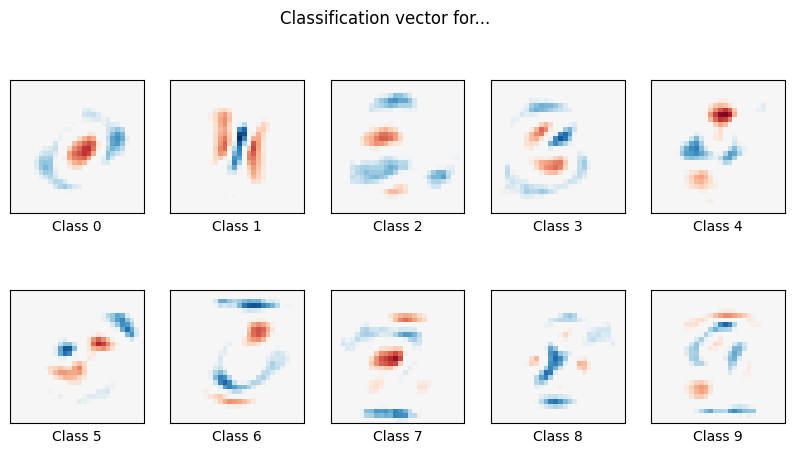

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [5]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

## Depth Variation

Epoch 1/20 - Train Loss: 1.8665 - Val Loss: 1.8721
Epoch 2/20 - Train Loss: 1.4636 - Val Loss: 1.4826
Epoch 3/20 - Train Loss: 1.1537 - Val Loss: 1.1976
Epoch 4/20 - Train Loss: 0.9607 - Val Loss: 1.0193
Epoch 5/20 - Train Loss: 0.8055 - Val Loss: 0.8938
Epoch 6/20 - Train Loss: 0.7241 - Val Loss: 0.8278
Epoch 7/20 - Train Loss: 0.6381 - Val Loss: 0.7746
Epoch 8/20 - Train Loss: 0.6394 - Val Loss: 0.7525
Epoch 9/20 - Train Loss: 0.5309 - Val Loss: 0.6889
Epoch 10/20 - Train Loss: 0.4758 - Val Loss: 0.6462
Epoch 11/20 - Train Loss: 0.4355 - Val Loss: 0.6199
Epoch 12/20 - Train Loss: 0.4124 - Val Loss: 0.6095
Epoch 13/20 - Train Loss: 0.3974 - Val Loss: 0.5887
Epoch 14/20 - Train Loss: 0.3536 - Val Loss: 0.5631
Epoch 15/20 - Train Loss: 0.3410 - Val Loss: 0.5720
Epoch 16/20 - Train Loss: 0.3236 - Val Loss: 0.5459
Epoch 17/20 - Train Loss: 0.2952 - Val Loss: 0.5320
Epoch 18/20 - Train Loss: 0.2945 - Val Loss: 0.5385
Epoch 19/20 - Train Loss: 0.2644 - Val Loss: 0.5090
Epoch 20/20 - Train L

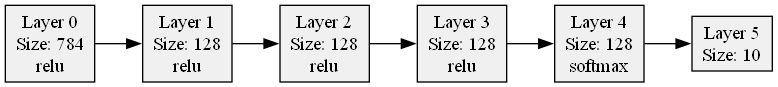

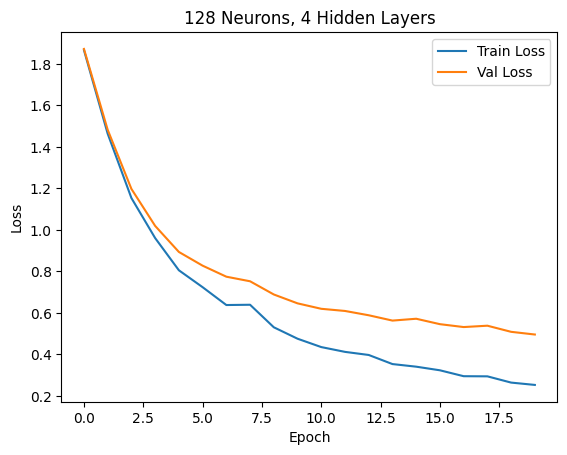

Epoch 1/20 - Train Loss: 1.7531 - Val Loss: 1.7319
Epoch 2/20 - Train Loss: 1.3525 - Val Loss: 1.3548
Epoch 3/20 - Train Loss: 1.0905 - Val Loss: 1.1125
Epoch 4/20 - Train Loss: 0.9306 - Val Loss: 0.9770
Epoch 5/20 - Train Loss: 0.7936 - Val Loss: 0.8563
Epoch 6/20 - Train Loss: 0.7121 - Val Loss: 0.7886
Epoch 7/20 - Train Loss: 0.6292 - Val Loss: 0.7331
Epoch 8/20 - Train Loss: 0.5791 - Val Loss: 0.6885
Epoch 9/20 - Train Loss: 0.5272 - Val Loss: 0.6582
Epoch 10/20 - Train Loss: 0.4797 - Val Loss: 0.6263
Epoch 11/20 - Train Loss: 0.4460 - Val Loss: 0.6036
Epoch 12/20 - Train Loss: 0.4185 - Val Loss: 0.5822
Epoch 13/20 - Train Loss: 0.3955 - Val Loss: 0.5613
Epoch 14/20 - Train Loss: 0.3677 - Val Loss: 0.5482
Epoch 15/20 - Train Loss: 0.3475 - Val Loss: 0.5424
Epoch 16/20 - Train Loss: 0.3319 - Val Loss: 0.5220
Epoch 17/20 - Train Loss: 0.3116 - Val Loss: 0.5189
Epoch 18/20 - Train Loss: 0.3023 - Val Loss: 0.5161
Epoch 19/20 - Train Loss: 0.2826 - Val Loss: 0.4999
Epoch 20/20 - Train L

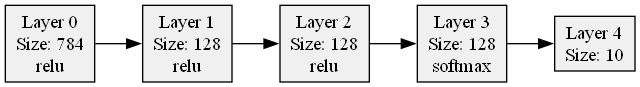

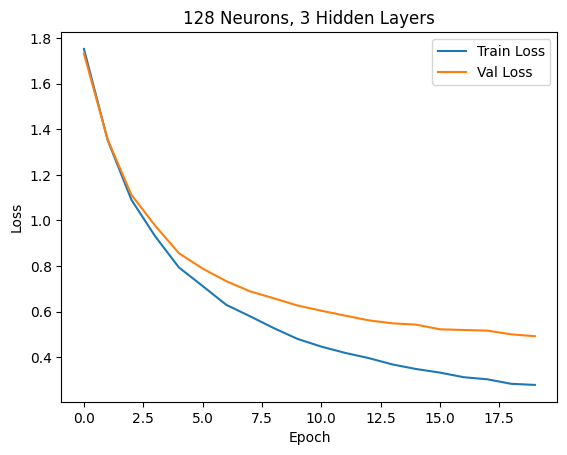

Epoch 1/20 - Train Loss: 1.7469 - Val Loss: 1.7485
Epoch 2/20 - Train Loss: 1.2737 - Val Loss: 1.2972
Epoch 3/20 - Train Loss: 1.0208 - Val Loss: 1.0852
Epoch 4/20 - Train Loss: 0.8652 - Val Loss: 0.9519
Epoch 5/20 - Train Loss: 0.7546 - Val Loss: 0.8604
Epoch 6/20 - Train Loss: 0.6752 - Val Loss: 0.7931
Epoch 7/20 - Train Loss: 0.6100 - Val Loss: 0.7538
Epoch 8/20 - Train Loss: 0.5683 - Val Loss: 0.7124
Epoch 9/20 - Train Loss: 0.5192 - Val Loss: 0.6841
Epoch 10/20 - Train Loss: 0.4827 - Val Loss: 0.6622
Epoch 11/20 - Train Loss: 0.4550 - Val Loss: 0.6452
Epoch 12/20 - Train Loss: 0.4283 - Val Loss: 0.6274
Epoch 13/20 - Train Loss: 0.4078 - Val Loss: 0.6135
Epoch 14/20 - Train Loss: 0.3859 - Val Loss: 0.6000
Epoch 15/20 - Train Loss: 0.3681 - Val Loss: 0.5935
Epoch 16/20 - Train Loss: 0.3527 - Val Loss: 0.5813
Epoch 17/20 - Train Loss: 0.3367 - Val Loss: 0.5736
Epoch 18/20 - Train Loss: 0.3241 - Val Loss: 0.5673
Epoch 19/20 - Train Loss: 0.3105 - Val Loss: 0.5538
Epoch 20/20 - Train L

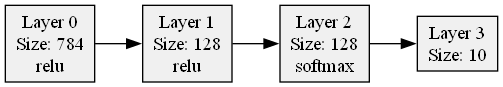

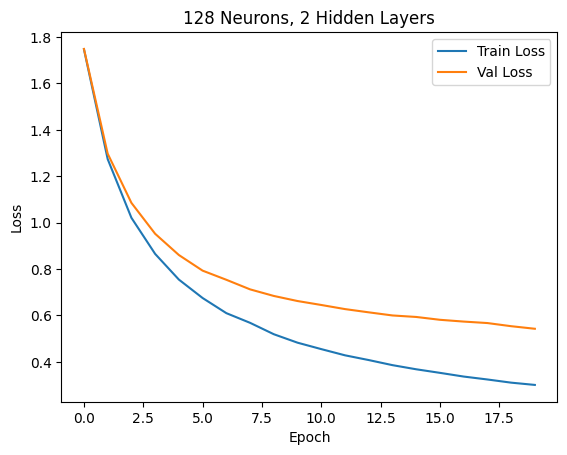


================= Hasil Perbandingan =================
TC 1 Accuracy: 85.84% | Waktu: 6.89s
TC 2 Accuracy: 85.98% | Waktu: 5.55s
TC 3 Accuracy: 85.97% | Waktu: 3.91s


In [ ]:
## Variasi depth FFNN
# 4 hidden layer
# ==============================
layer_sizes = [784, 128, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0

# 3 hidden layer
# ==============================
layer_sizes = [784, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 3 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc2_accuracy = np.mean(test_pred_classes == y_test_int)
tc2_time = time.time() - t0

# 2 hidden layer
# ==============================
layer_sizes = [784, 128, 128, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 2 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc3_accuracy = np.mean(test_pred_classes == y_test_int)
tc3_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"TC 1 Accuracy: {tc1_accuracy * 100:.2f}% | Waktu: {tc1_time:.2f}s")
print(f"TC 2 Accuracy: {tc2_accuracy * 100:.2f}% | Waktu: {tc2_time:.2f}s")
print(f"TC 3 Accuracy: {tc3_accuracy * 100:.2f}% | Waktu: {tc3_time:.2f}s")
print("=======================================================")

## Width Variation

Epoch 1/20 - Train Loss: 1.8665 - Val Loss: 1.8721
Epoch 2/20 - Train Loss: 1.4636 - Val Loss: 1.4826
Epoch 3/20 - Train Loss: 1.1537 - Val Loss: 1.1976
Epoch 4/20 - Train Loss: 0.9607 - Val Loss: 1.0193
Epoch 5/20 - Train Loss: 0.8055 - Val Loss: 0.8938
Epoch 6/20 - Train Loss: 0.7241 - Val Loss: 0.8278
Epoch 7/20 - Train Loss: 0.6381 - Val Loss: 0.7746
Epoch 8/20 - Train Loss: 0.6394 - Val Loss: 0.7525
Epoch 9/20 - Train Loss: 0.5309 - Val Loss: 0.6889
Epoch 10/20 - Train Loss: 0.4758 - Val Loss: 0.6462
Epoch 11/20 - Train Loss: 0.4355 - Val Loss: 0.6199
Epoch 12/20 - Train Loss: 0.4124 - Val Loss: 0.6095
Epoch 13/20 - Train Loss: 0.3974 - Val Loss: 0.5887
Epoch 14/20 - Train Loss: 0.3536 - Val Loss: 0.5631
Epoch 15/20 - Train Loss: 0.3410 - Val Loss: 0.5720
Epoch 16/20 - Train Loss: 0.3236 - Val Loss: 0.5459
Epoch 17/20 - Train Loss: 0.2952 - Val Loss: 0.5320
Epoch 18/20 - Train Loss: 0.2945 - Val Loss: 0.5385
Epoch 19/20 - Train Loss: 0.2644 - Val Loss: 0.5090
Epoch 20/20 - Train L

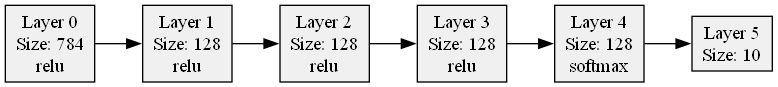

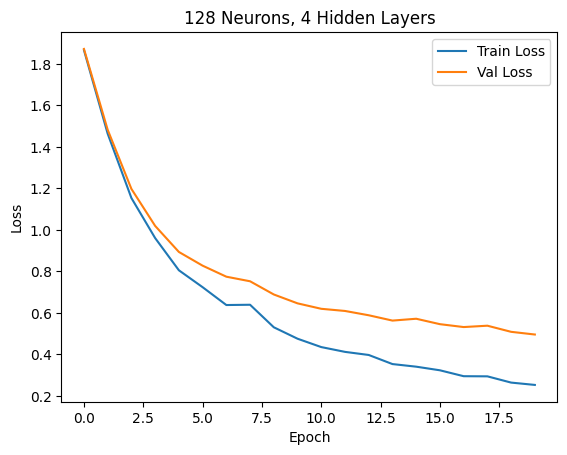

Epoch 1/20 - Train Loss: 2.2942 - Val Loss: 2.2930
Epoch 2/20 - Train Loss: 2.2458 - Val Loss: 2.2479
Epoch 3/20 - Train Loss: 2.1894 - Val Loss: 2.1924
Epoch 4/20 - Train Loss: 2.1143 - Val Loss: 2.1169
Epoch 5/20 - Train Loss: 2.0169 - Val Loss: 2.0179
Epoch 6/20 - Train Loss: 1.8993 - Val Loss: 1.9034
Epoch 7/20 - Train Loss: 1.7567 - Val Loss: 1.7672
Epoch 8/20 - Train Loss: 1.5941 - Val Loss: 1.6163
Epoch 9/20 - Train Loss: 1.4271 - Val Loss: 1.4581
Epoch 10/20 - Train Loss: 1.2825 - Val Loss: 1.3268
Epoch 11/20 - Train Loss: 1.1572 - Val Loss: 1.2209
Epoch 12/20 - Train Loss: 1.0492 - Val Loss: 1.1153
Epoch 13/20 - Train Loss: 0.9535 - Val Loss: 1.0293
Epoch 14/20 - Train Loss: 0.8983 - Val Loss: 0.9816
Epoch 15/20 - Train Loss: 0.8044 - Val Loss: 0.8987
Epoch 16/20 - Train Loss: 0.7491 - Val Loss: 0.8496
Epoch 17/20 - Train Loss: 0.7066 - Val Loss: 0.8204
Epoch 18/20 - Train Loss: 0.6515 - Val Loss: 0.7671
Epoch 19/20 - Train Loss: 0.6206 - Val Loss: 0.7405
Epoch 20/20 - Train L

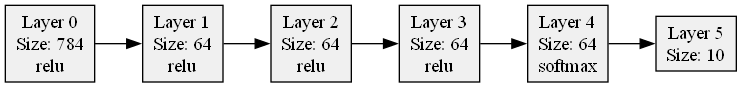

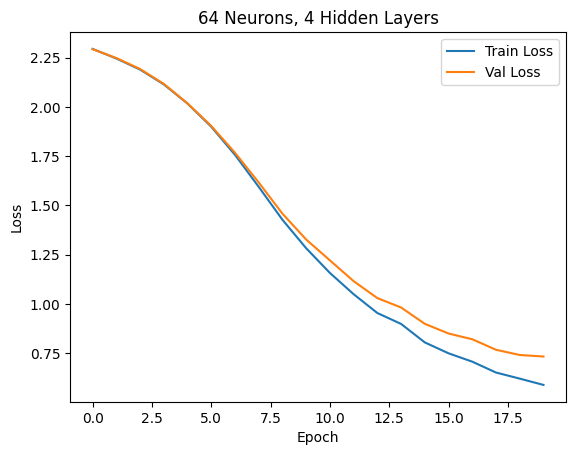

Epoch 1/20 - Train Loss: 2.3015 - Val Loss: 2.3024
Epoch 2/20 - Train Loss: 2.2980 - Val Loss: 2.2991
Epoch 3/20 - Train Loss: 2.2945 - Val Loss: 2.2956
Epoch 4/20 - Train Loss: 2.2909 - Val Loss: 2.2920
Epoch 5/20 - Train Loss: 2.2870 - Val Loss: 2.2882
Epoch 6/20 - Train Loss: 2.2826 - Val Loss: 2.2837
Epoch 7/20 - Train Loss: 2.2777 - Val Loss: 2.2787
Epoch 8/20 - Train Loss: 2.2720 - Val Loss: 2.2730
Epoch 9/20 - Train Loss: 2.2655 - Val Loss: 2.2665
Epoch 10/20 - Train Loss: 2.2578 - Val Loss: 2.2589
Epoch 11/20 - Train Loss: 2.2483 - Val Loss: 2.2496
Epoch 12/20 - Train Loss: 2.2365 - Val Loss: 2.2380
Epoch 13/20 - Train Loss: 2.2214 - Val Loss: 2.2234
Epoch 14/20 - Train Loss: 2.2026 - Val Loss: 2.2052
Epoch 15/20 - Train Loss: 2.1777 - Val Loss: 2.1812
Epoch 16/20 - Train Loss: 2.1464 - Val Loss: 2.1503
Epoch 17/20 - Train Loss: 2.1061 - Val Loss: 2.1102
Epoch 18/20 - Train Loss: 2.0578 - Val Loss: 2.0605
Epoch 19/20 - Train Loss: 1.9995 - Val Loss: 1.9996
Epoch 20/20 - Train L

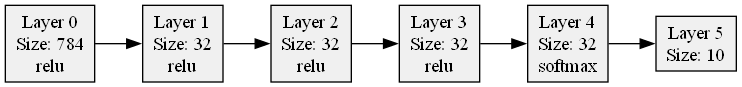

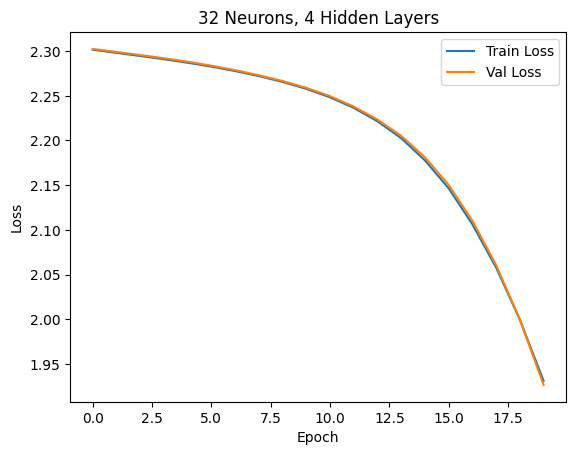


================= Hasil Perbandingan =================
TC 1 Accuracy: 85.84% | Waktu: 7.77s
TC 2 Accuracy: 78.33% | Waktu: 7.42s
TC 3 Accuracy: 40.77% | Waktu: 3.87s


In [7]:
## Variasi width FFNN
# 128 neuron
# ==============================
layer_sizes = [784, 128, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0

# 64 neuron
# ==============================
layer_sizes = [784, 64, 64, 64, 64, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('64 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc2_accuracy = np.mean(test_pred_classes == y_test_int)
tc2_time = time.time() - t0

# 32 neuron
# ==============================
layer_sizes = [784, 32, 32, 32, 32, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('32 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc3_accuracy = np.mean(test_pred_classes == y_test_int)
tc3_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"TC 1 Accuracy: {tc1_accuracy * 100:.2f}% | Waktu: {tc1_time:.2f}s")
print(f"TC 2 Accuracy: {tc2_accuracy * 100:.2f}% | Waktu: {tc2_time:.2f}s")
print(f"TC 3 Accuracy: {tc3_accuracy * 100:.2f}% | Waktu: {tc3_time:.2f}s")
print("=======================================================")

## Activation Function Variation

Epoch 1/20 - Train Loss: 1.9238 - Val Loss: 1.9168
Epoch 2/20 - Train Loss: 1.5349 - Val Loss: 1.5337
Epoch 3/20 - Train Loss: 1.2588 - Val Loss: 1.2672
Epoch 4/20 - Train Loss: 1.0656 - Val Loss: 1.0961
Epoch 5/20 - Train Loss: 0.9253 - Val Loss: 0.9729
Epoch 6/20 - Train Loss: 0.8216 - Val Loss: 0.8830
Epoch 7/20 - Train Loss: 0.7406 - Val Loss: 0.8116
Epoch 8/20 - Train Loss: 0.6767 - Val Loss: 0.7611
Epoch 9/20 - Train Loss: 0.6221 - Val Loss: 0.7157
Epoch 10/20 - Train Loss: 0.5770 - Val Loss: 0.6801
Epoch 11/20 - Train Loss: 0.5392 - Val Loss: 0.6480
Epoch 12/20 - Train Loss: 0.5048 - Val Loss: 0.6187
Epoch 13/20 - Train Loss: 0.4757 - Val Loss: 0.6005
Epoch 14/20 - Train Loss: 0.4538 - Val Loss: 0.5816
Epoch 15/20 - Train Loss: 0.4275 - Val Loss: 0.5639
Epoch 16/20 - Train Loss: 0.4077 - Val Loss: 0.5510
Epoch 17/20 - Train Loss: 0.3922 - Val Loss: 0.5407
Epoch 18/20 - Train Loss: 0.3744 - Val Loss: 0.5291
Epoch 19/20 - Train Loss: 0.3610 - Val Loss: 0.5182
Epoch 20/20 - Train L

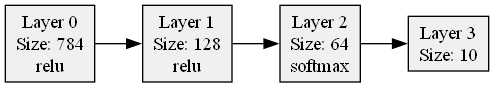

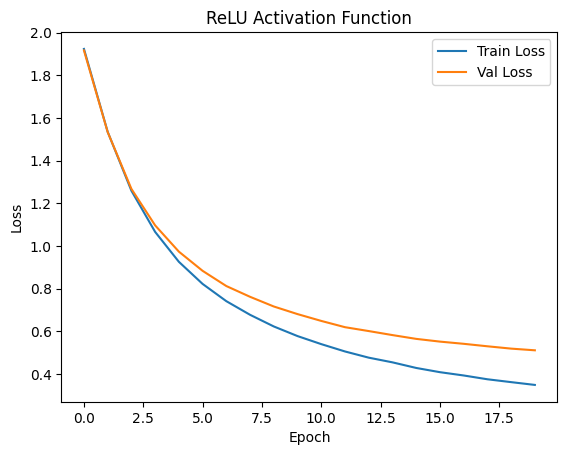

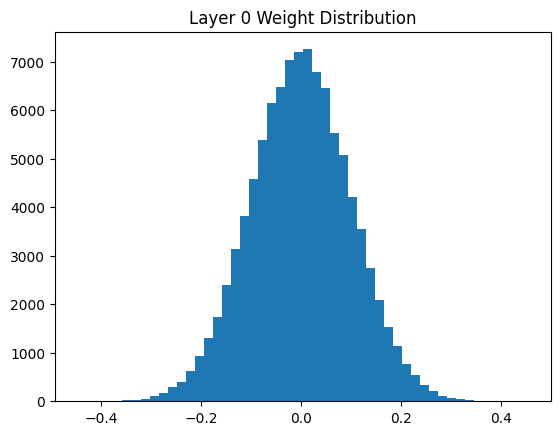

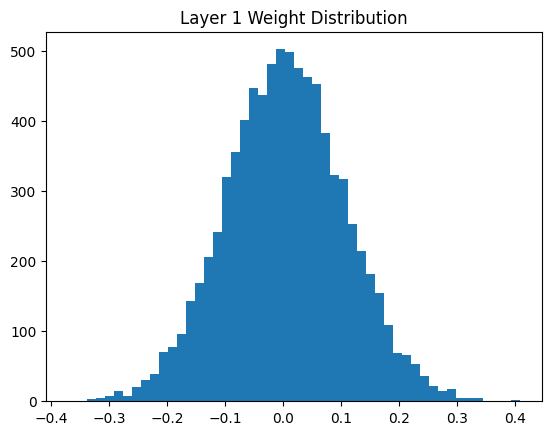

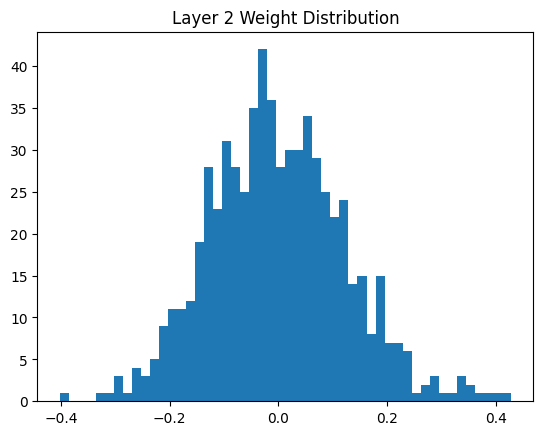

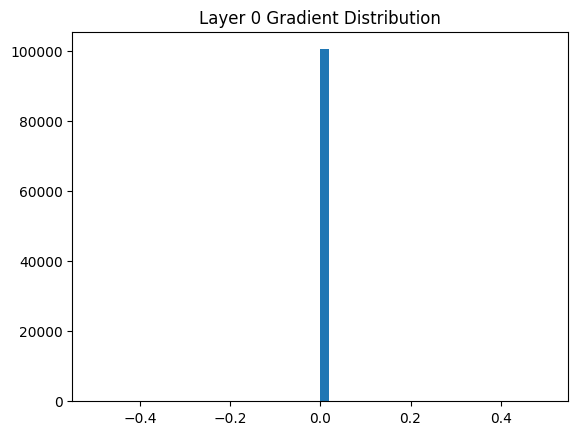

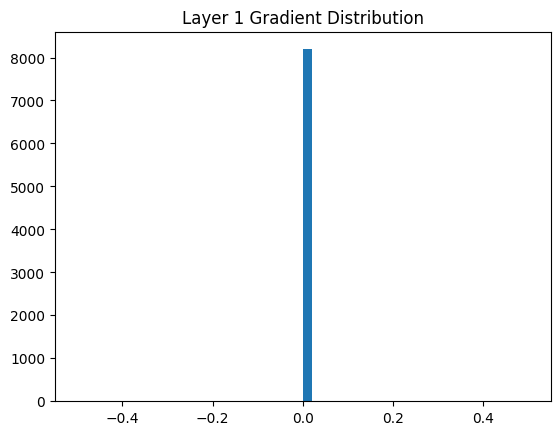

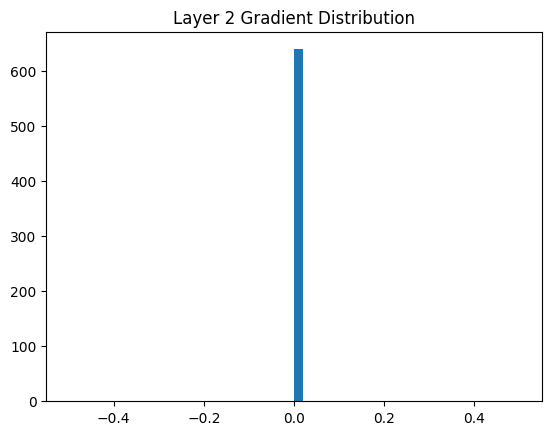

Epoch 1/20 - Train Loss: 2.3033 - Val Loss: 2.3034
Epoch 2/20 - Train Loss: 2.2864 - Val Loss: 2.2854
Epoch 3/20 - Train Loss: 2.2766 - Val Loss: 2.2744
Epoch 4/20 - Train Loss: 2.2681 - Val Loss: 2.2658
Epoch 5/20 - Train Loss: 2.2598 - Val Loss: 2.2572
Epoch 6/20 - Train Loss: 2.2518 - Val Loss: 2.2493
Epoch 7/20 - Train Loss: 2.2437 - Val Loss: 2.2413
Epoch 8/20 - Train Loss: 2.2354 - Val Loss: 2.2329
Epoch 9/20 - Train Loss: 2.2271 - Val Loss: 2.2242
Epoch 10/20 - Train Loss: 2.2186 - Val Loss: 2.2156
Epoch 11/20 - Train Loss: 2.2099 - Val Loss: 2.2071
Epoch 12/20 - Train Loss: 2.2010 - Val Loss: 2.1975
Epoch 13/20 - Train Loss: 2.1919 - Val Loss: 2.1873
Epoch 14/20 - Train Loss: 2.1826 - Val Loss: 2.1781
Epoch 15/20 - Train Loss: 2.1729 - Val Loss: 2.1680
Epoch 16/20 - Train Loss: 2.1630 - Val Loss: 2.1575
Epoch 17/20 - Train Loss: 2.1530 - Val Loss: 2.1468
Epoch 18/20 - Train Loss: 2.1425 - Val Loss: 2.1364
Epoch 19/20 - Train Loss: 2.1319 - Val Loss: 2.1269
Epoch 20/20 - Train L

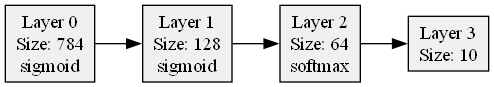

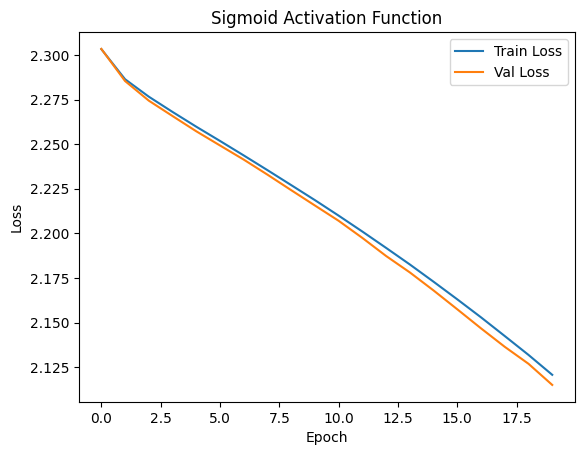

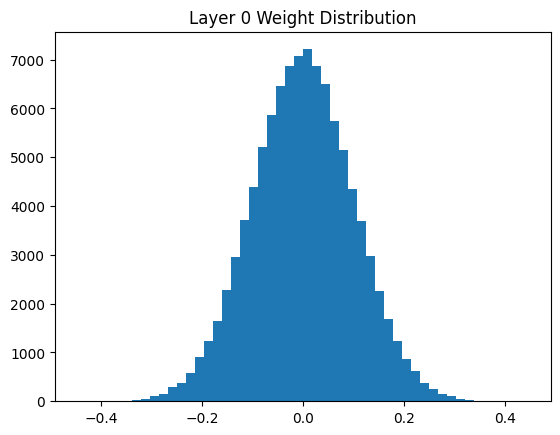

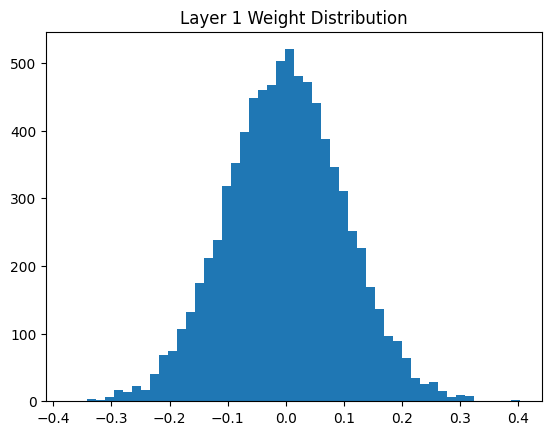

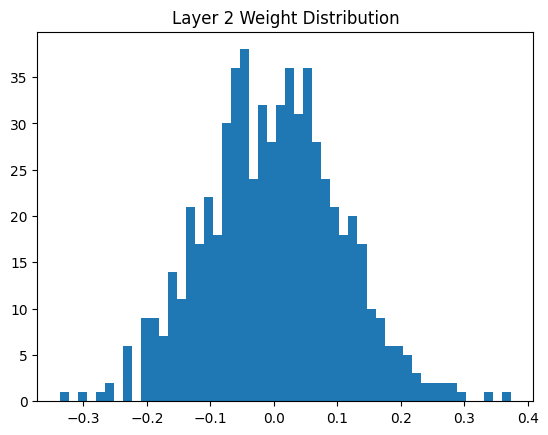

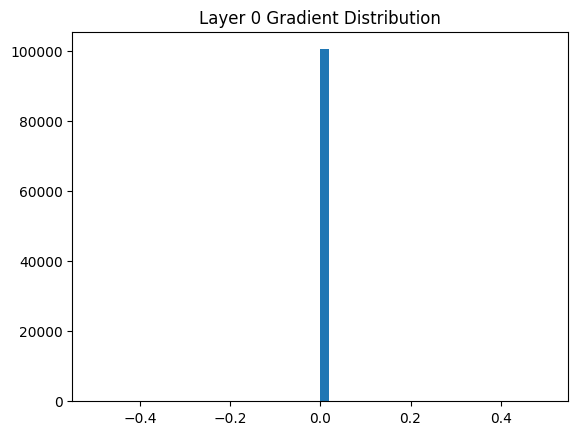

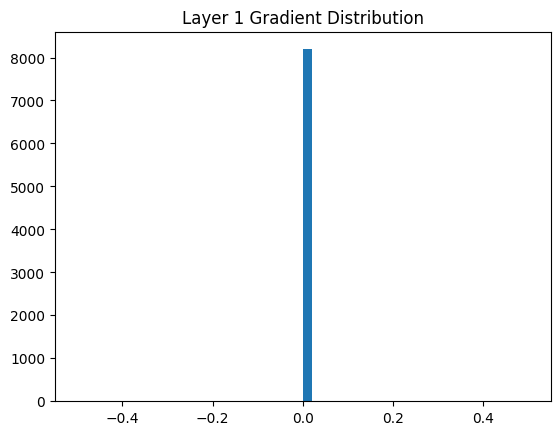

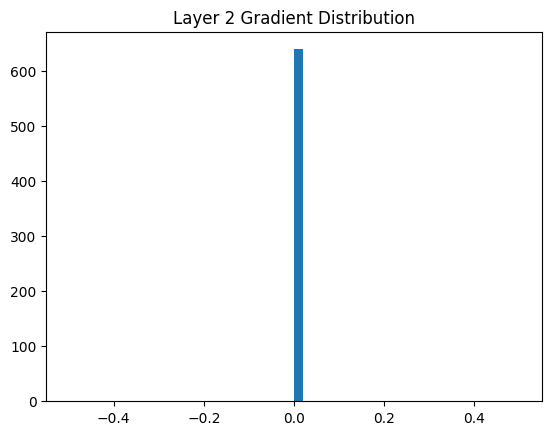

c:\Users\Jimly\Documents\whitebox\src\Layer.py:68: RuntimeWarning: overflow encountered in exp
  self.A = 1 / (1 + np.exp(-self.Z))


Epoch 1/20 - Train Loss: 1.5544 - Val Loss: 1.5248
Epoch 2/20 - Train Loss: 1.1523 - Val Loss: 1.1336
Epoch 3/20 - Train Loss: 0.9750 - Val Loss: 0.9652
Epoch 4/20 - Train Loss: 0.8696 - Val Loss: 0.8658
Epoch 5/20 - Train Loss: 0.7984 - Val Loss: 0.8041
Epoch 6/20 - Train Loss: 0.7455 - Val Loss: 0.7589
Epoch 7/20 - Train Loss: 0.7051 - Val Loss: 0.7220
Epoch 8/20 - Train Loss: 0.6711 - Val Loss: 0.6957
Epoch 9/20 - Train Loss: 0.6424 - Val Loss: 0.6715
Epoch 10/20 - Train Loss: 0.6186 - Val Loss: 0.6511
Epoch 11/20 - Train Loss: 0.5981 - Val Loss: 0.6363
Epoch 12/20 - Train Loss: 0.5803 - Val Loss: 0.6216
Epoch 13/20 - Train Loss: 0.5647 - Val Loss: 0.6107
Epoch 14/20 - Train Loss: 0.5512 - Val Loss: 0.6037
Epoch 15/20 - Train Loss: 0.5370 - Val Loss: 0.5927
Epoch 16/20 - Train Loss: 0.5254 - Val Loss: 0.5846
Epoch 17/20 - Train Loss: 0.5149 - Val Loss: 0.5762
Epoch 18/20 - Train Loss: 0.5050 - Val Loss: 0.5700
Epoch 19/20 - Train Loss: 0.4956 - Val Loss: 0.5660
Epoch 20/20 - Train L

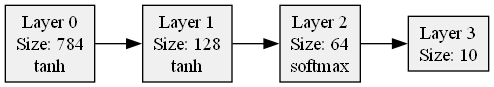

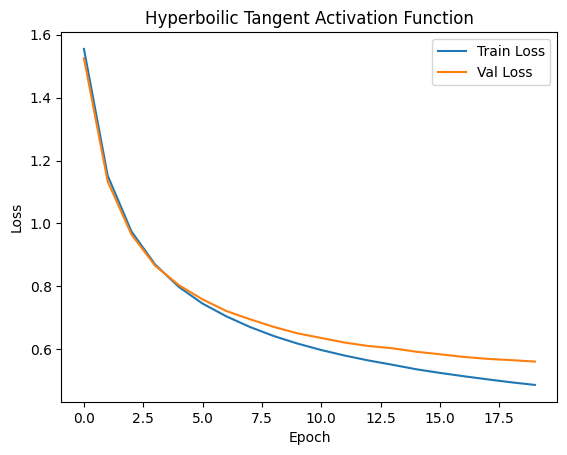

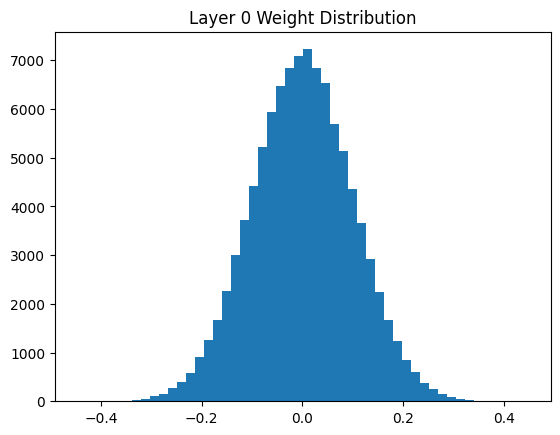

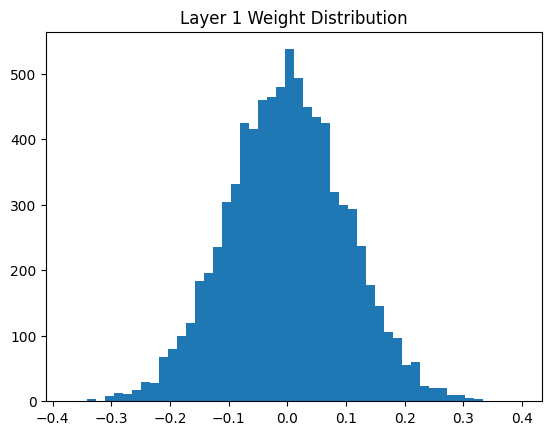

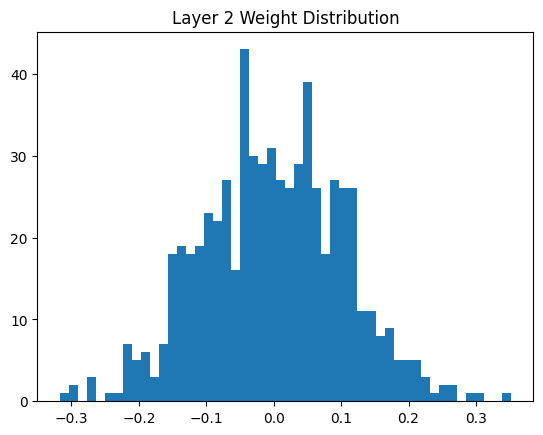

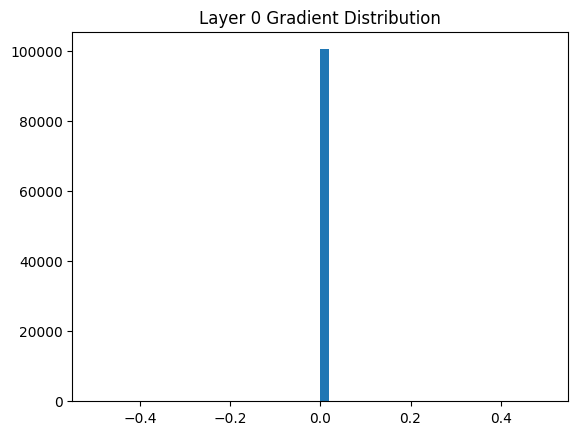

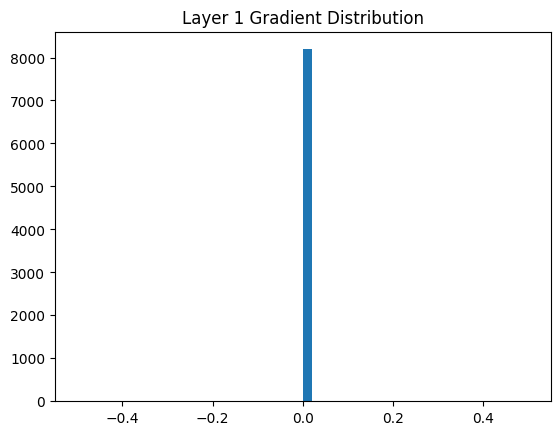

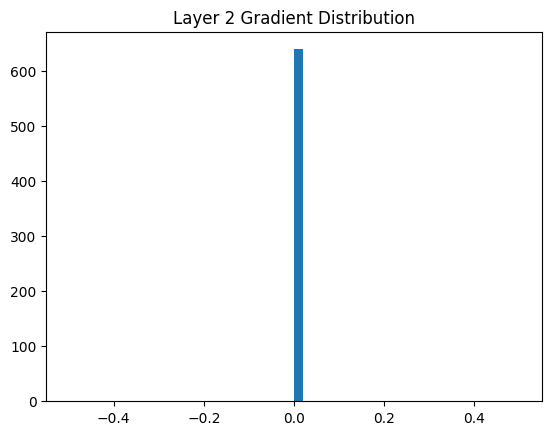

Epoch 1/20 - Train Loss: 1.0913 - Val Loss: 1.1044
Epoch 2/20 - Train Loss: 0.7817 - Val Loss: 0.8184
Epoch 3/20 - Train Loss: 0.6433 - Val Loss: 0.6997
Epoch 4/20 - Train Loss: 0.5623 - Val Loss: 0.6336
Epoch 5/20 - Train Loss: 0.5076 - Val Loss: 0.5924
Epoch 6/20 - Train Loss: 0.4685 - Val Loss: 0.5628
Epoch 7/20 - Train Loss: 0.4374 - Val Loss: 0.5390
Epoch 8/20 - Train Loss: 0.4138 - Val Loss: 0.5237
Epoch 9/20 - Train Loss: 0.3917 - Val Loss: 0.5103
Epoch 10/20 - Train Loss: 0.3737 - Val Loss: 0.5007
Epoch 11/20 - Train Loss: 0.3586 - Val Loss: 0.4932
Epoch 12/20 - Train Loss: 0.3451 - Val Loss: 0.4856
Epoch 13/20 - Train Loss: 0.3336 - Val Loss: 0.4815
Epoch 14/20 - Train Loss: 0.3235 - Val Loss: 0.4740
Epoch 15/20 - Train Loss: 0.3144 - Val Loss: 0.4715
Epoch 16/20 - Train Loss: 0.3062 - Val Loss: 0.4695
Epoch 17/20 - Train Loss: 0.2992 - Val Loss: 0.4653
Epoch 18/20 - Train Loss: 0.2916 - Val Loss: 0.4624
Epoch 19/20 - Train Loss: 0.2850 - Val Loss: 0.4641
Epoch 20/20 - Train L

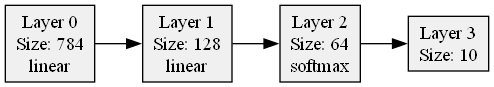

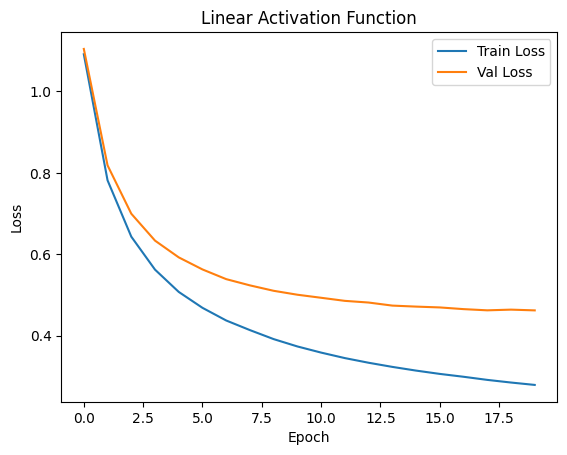

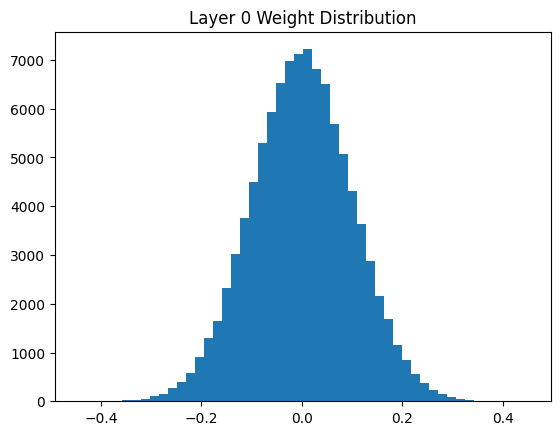

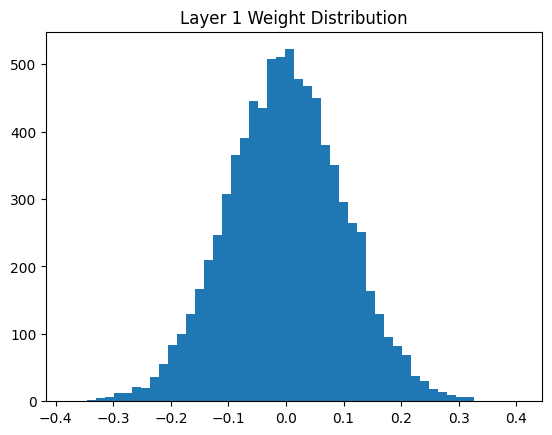

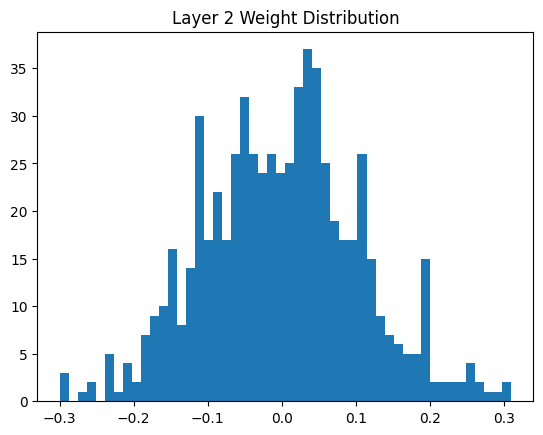

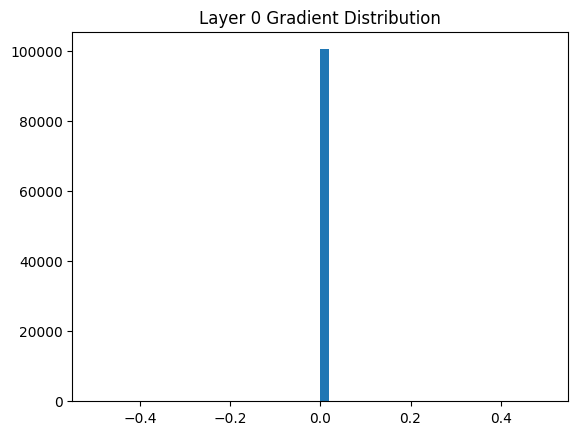

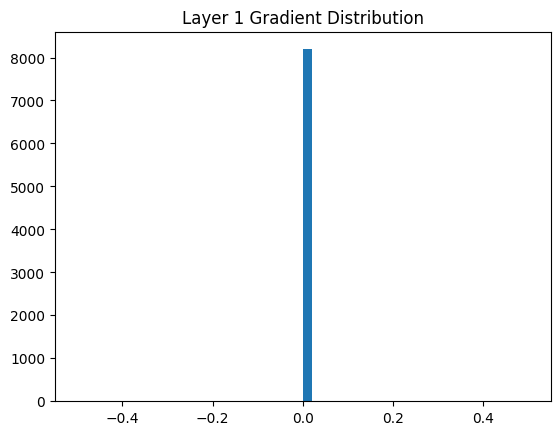

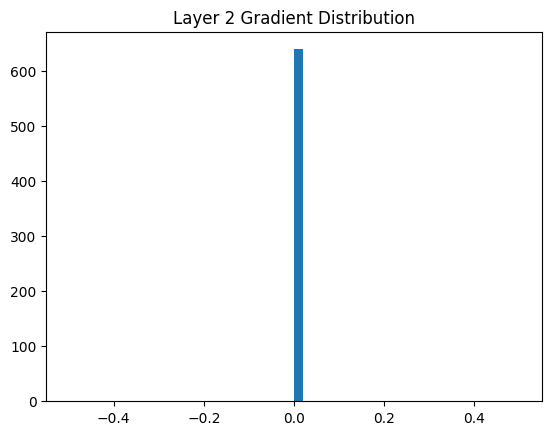


================= Hasil Perbandingan =================
ReLU accuracy: 85.63% | Waktu: 8.19s
Sigmoid accuracy: 50.48% | Waktu: 5.44s
tanh accuracy: 83.40% | Waktu: 4.70s
Linear accuracy: 87.12% | Waktu: 4.07s


In [8]:
## Variasi activation FFNN

# 1. ReLU
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('ReLU Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
ReLU_accuracy = np.mean(test_pred_classes == y_test_int)
ReLU_time = time.time() - t0


# 2. Sigmoid
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['sigmoid', 'sigmoid', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Sigmoid Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
sigmoid_accuracy = np.mean(test_pred_classes == y_test_int)
sigmoid_time = time.time() - t0


# 3. Tanh
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['tanh', 'tanh', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Hyperboilic Tangent Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tanh_accuracy = np.mean(test_pred_classes == y_test_int)
tanh_time = time.time() - t0


# 4. Linear
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['linear', 'linear', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()


plt.title('Linear Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
linear_accuracy = np.mean(test_pred_classes == y_test_int)
linear_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"ReLU accuracy: {ReLU_accuracy * 100:.2f}% | Waktu: {ReLU_time:.2f}s")
print(f"Sigmoid accuracy: {sigmoid_accuracy * 100:.2f}% | Waktu: {sigmoid_time:.2f}s")
print(f"tanh accuracy: {tanh_accuracy * 100:.2f}% | Waktu: {tanh_time:.2f}s")
print(f"Linear accuracy: {linear_accuracy * 100:.2f}% | Waktu: {linear_time:.2f}s")
print("=======================================================")

## Learning Rate Variation

Epoch 1/20 - Train Loss: 2.5274 - Val Loss: 2.4977
Epoch 2/20 - Train Loss: 2.4178 - Val Loss: 2.3936
Epoch 3/20 - Train Loss: 2.3304 - Val Loss: 2.3095
Epoch 4/20 - Train Loss: 2.2546 - Val Loss: 2.2369
Epoch 5/20 - Train Loss: 2.1879 - Val Loss: 2.1725
Epoch 6/20 - Train Loss: 2.1287 - Val Loss: 2.1149
Epoch 7/20 - Train Loss: 2.0731 - Val Loss: 2.0609
Epoch 8/20 - Train Loss: 2.0213 - Val Loss: 2.0104
Epoch 9/20 - Train Loss: 1.9723 - Val Loss: 1.9621
Epoch 10/20 - Train Loss: 1.9255 - Val Loss: 1.9160
Epoch 11/20 - Train Loss: 1.8802 - Val Loss: 1.8717
Epoch 12/20 - Train Loss: 1.8364 - Val Loss: 1.8286
Epoch 13/20 - Train Loss: 1.7944 - Val Loss: 1.7869
Epoch 14/20 - Train Loss: 1.7536 - Val Loss: 1.7473
Epoch 15/20 - Train Loss: 1.7139 - Val Loss: 1.7084
Epoch 16/20 - Train Loss: 1.6759 - Val Loss: 1.6712
Epoch 17/20 - Train Loss: 1.6389 - Val Loss: 1.6349
Epoch 18/20 - Train Loss: 1.6032 - Val Loss: 1.6000
Epoch 19/20 - Train Loss: 1.5689 - Val Loss: 1.5667
Epoch 20/20 - Train L

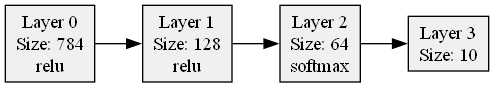

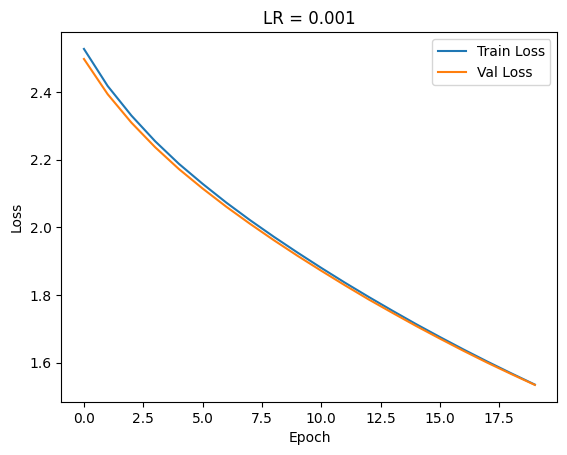

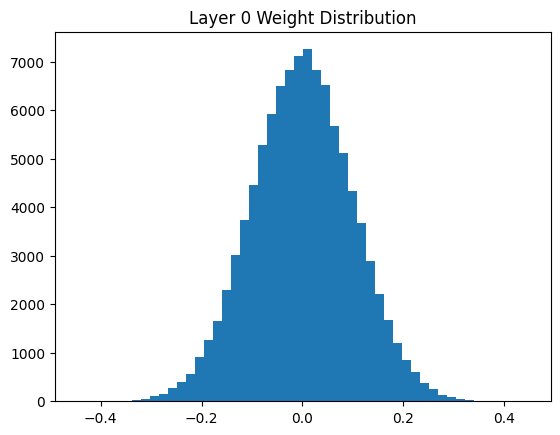

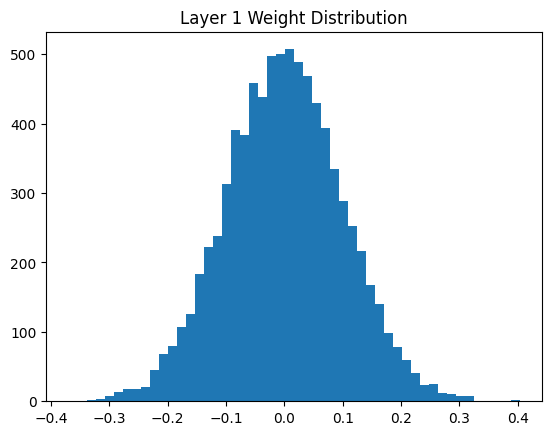

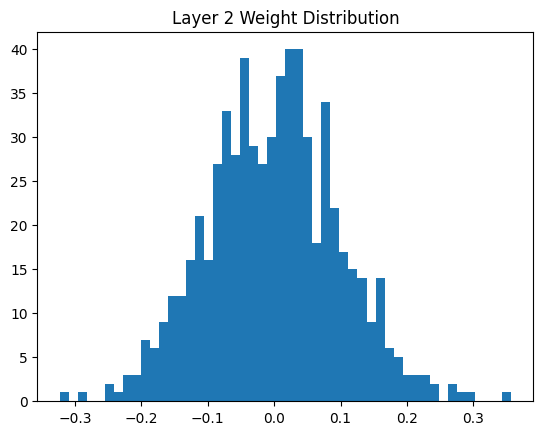

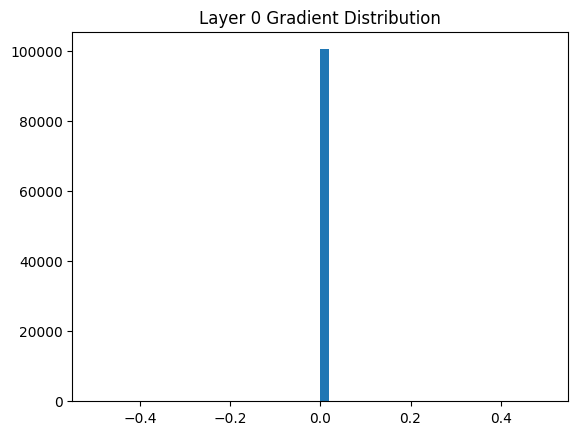

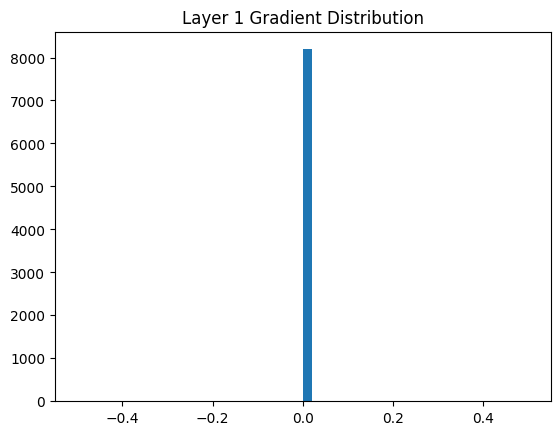

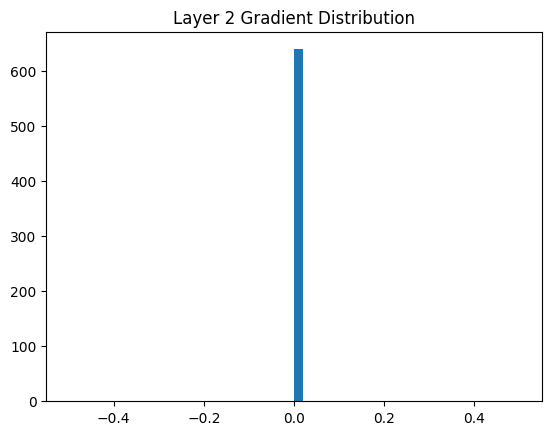

Epoch 1/20 - Train Loss: 1.9238 - Val Loss: 1.9168
Epoch 2/20 - Train Loss: 1.5349 - Val Loss: 1.5337
Epoch 3/20 - Train Loss: 1.2588 - Val Loss: 1.2672
Epoch 4/20 - Train Loss: 1.0656 - Val Loss: 1.0961
Epoch 5/20 - Train Loss: 0.9253 - Val Loss: 0.9729
Epoch 6/20 - Train Loss: 0.8216 - Val Loss: 0.8830
Epoch 7/20 - Train Loss: 0.7406 - Val Loss: 0.8116
Epoch 8/20 - Train Loss: 0.6767 - Val Loss: 0.7611
Epoch 9/20 - Train Loss: 0.6221 - Val Loss: 0.7157
Epoch 10/20 - Train Loss: 0.5770 - Val Loss: 0.6801
Epoch 11/20 - Train Loss: 0.5392 - Val Loss: 0.6480
Epoch 12/20 - Train Loss: 0.5048 - Val Loss: 0.6187
Epoch 13/20 - Train Loss: 0.4757 - Val Loss: 0.6005
Epoch 14/20 - Train Loss: 0.4538 - Val Loss: 0.5816
Epoch 15/20 - Train Loss: 0.4275 - Val Loss: 0.5639
Epoch 16/20 - Train Loss: 0.4077 - Val Loss: 0.5510
Epoch 17/20 - Train Loss: 0.3922 - Val Loss: 0.5407
Epoch 18/20 - Train Loss: 0.3744 - Val Loss: 0.5291
Epoch 19/20 - Train Loss: 0.3610 - Val Loss: 0.5182
Epoch 20/20 - Train L

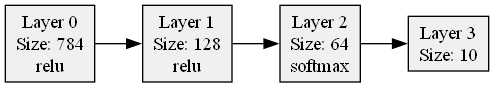

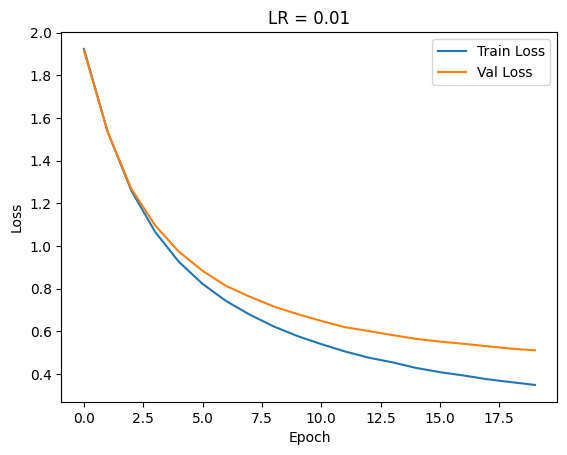

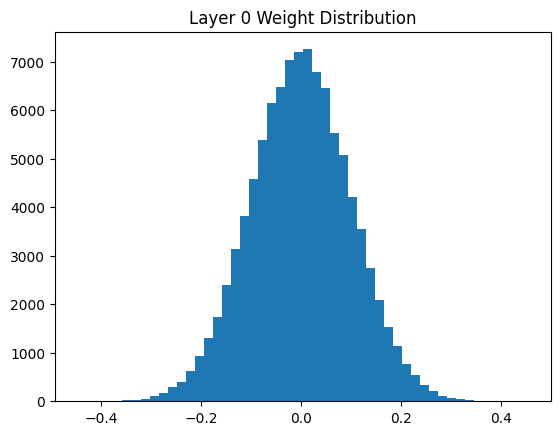

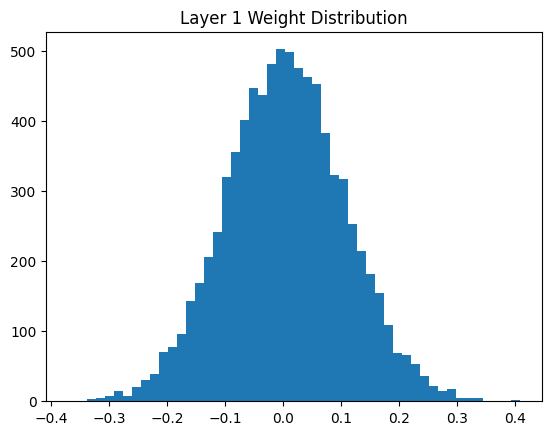

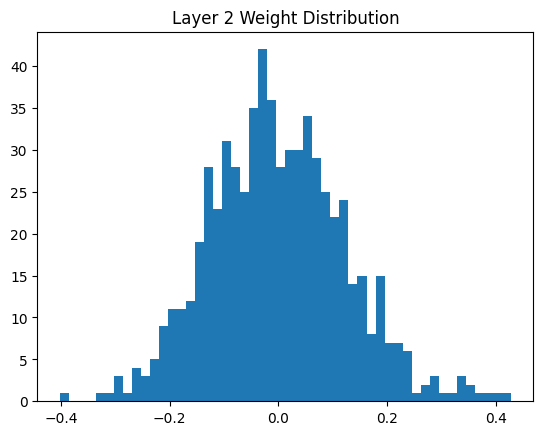

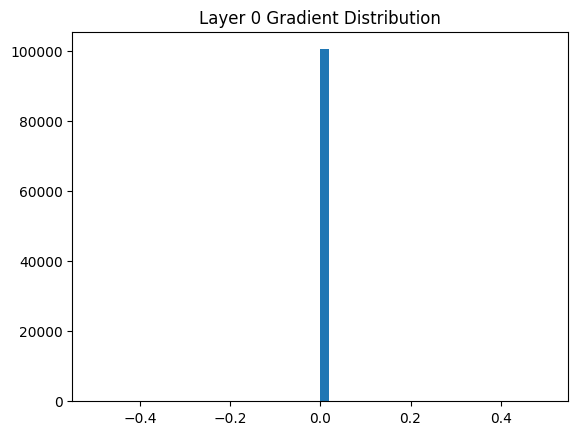

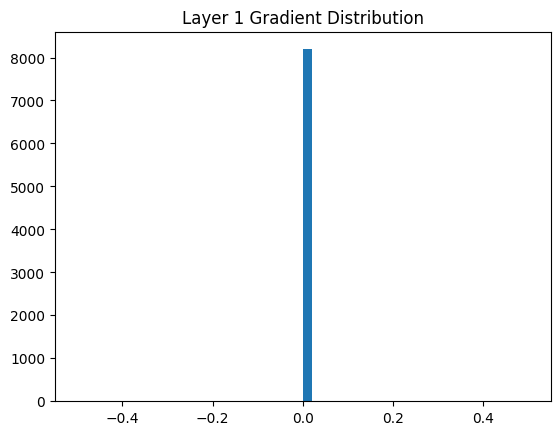

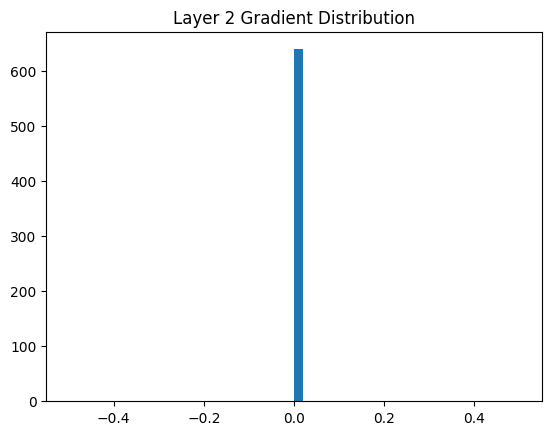

Epoch 1/20 - Train Loss: 0.6255 - Val Loss: 0.7069
Epoch 2/20 - Train Loss: 0.4138 - Val Loss: 0.5556
Epoch 3/20 - Train Loss: 0.3509 - Val Loss: 0.5560
Epoch 4/20 - Train Loss: 0.2179 - Val Loss: 0.4498
Epoch 5/20 - Train Loss: 0.1827 - Val Loss: 0.4369
Epoch 6/20 - Train Loss: 0.2021 - Val Loss: 0.4865
Epoch 7/20 - Train Loss: 0.2003 - Val Loss: 0.5305
Epoch 8/20 - Train Loss: 0.1237 - Val Loss: 0.4123
Epoch 9/20 - Train Loss: 0.0805 - Val Loss: 0.4089
Epoch 10/20 - Train Loss: 0.0801 - Val Loss: 0.4388
Epoch 11/20 - Train Loss: 0.0729 - Val Loss: 0.4444
Epoch 12/20 - Train Loss: 0.0522 - Val Loss: 0.4120
Epoch 13/20 - Train Loss: 0.0417 - Val Loss: 0.4141
Epoch 14/20 - Train Loss: 0.0372 - Val Loss: 0.4224
Epoch 15/20 - Train Loss: 0.0317 - Val Loss: 0.4208
Epoch 16/20 - Train Loss: 0.0288 - Val Loss: 0.4261
Epoch 17/20 - Train Loss: 0.0260 - Val Loss: 0.4291
Epoch 18/20 - Train Loss: 0.0215 - Val Loss: 0.4344
Epoch 19/20 - Train Loss: 0.0209 - Val Loss: 0.4351
Epoch 20/20 - Train L

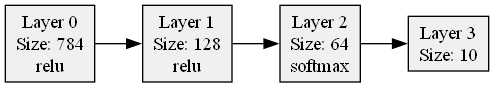

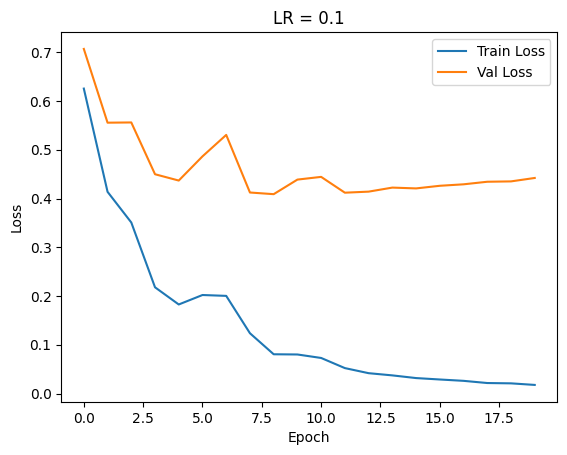

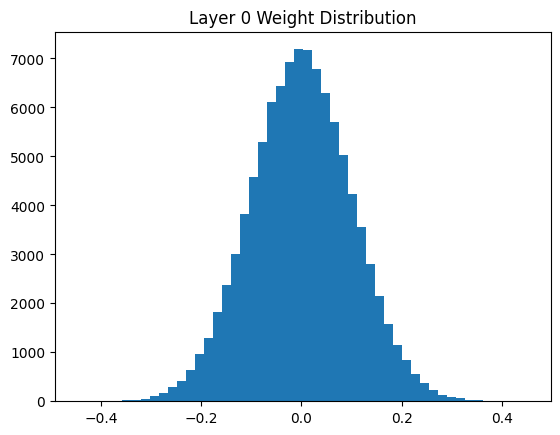

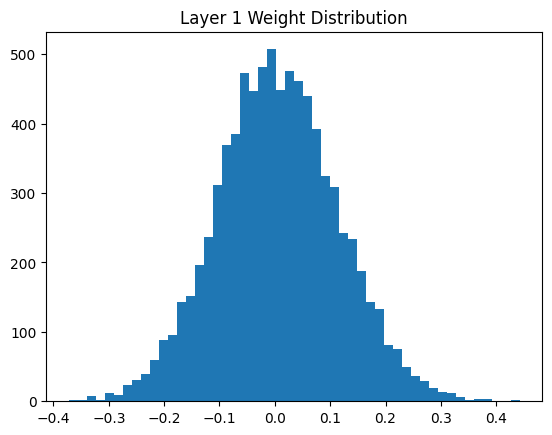

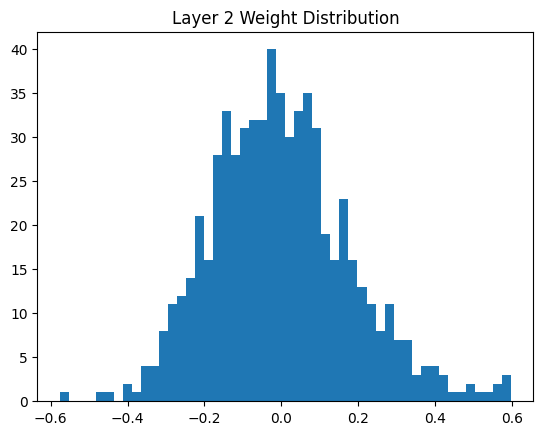

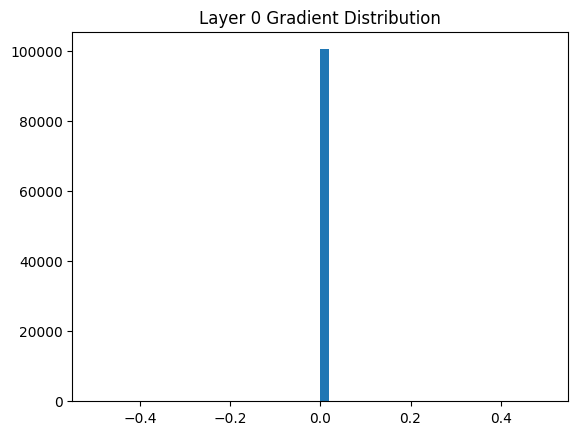

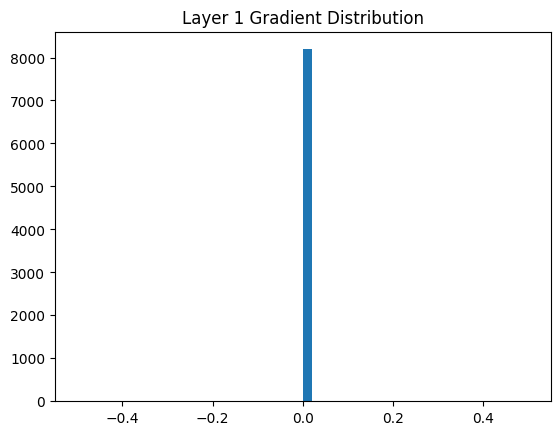

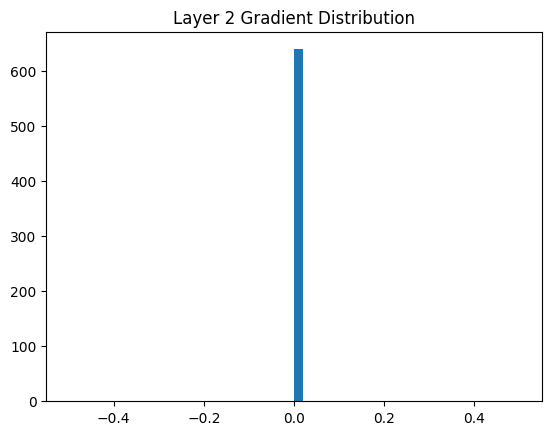


================= Hasil Perbandingan =================
TC 1 Accuracy: 53.09% | Waktu: 4.59s
TC 2 Accuracy: 85.63% | Waktu: 5.43s
TC 3 Accuracy: 90.73% | Waktu: 4.82s


In [9]:
## Variasi activation FFNN

# 1. Learning Rate = 0.001
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.001,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('LR = 0.001')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0


# 2. Learning Rate = 0.01
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('LR = 0.01')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc2_accuracy = np.mean(test_pred_classes == y_test_int)
tc2_time = time.time() - t0


# 3. Learning Rate = 0.1
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.1,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('LR = 0.1')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc3_accuracy = np.mean(test_pred_classes == y_test_int)
tc3_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"TC 1 Accuracy: {tc1_accuracy * 100:.2f}% | Waktu: {tc1_time:.2f}s")
print(f"TC 2 Accuracy: {tc2_accuracy * 100:.2f}% | Waktu: {tc2_time:.2f}s")
print(f"TC 3 Accuracy: {tc3_accuracy * 100:.2f}% | Waktu: {tc3_time:.2f}s")
print("=======================================================")

## Weight Initialization Variation

Epoch 1/20 - Train Loss: 2.3025 - Val Loss: 2.3024
Epoch 2/20 - Train Loss: 2.3024 - Val Loss: 2.3022
Epoch 3/20 - Train Loss: 2.3023 - Val Loss: 2.3020
Epoch 4/20 - Train Loss: 2.3022 - Val Loss: 2.3019
Epoch 5/20 - Train Loss: 2.3021 - Val Loss: 2.3017
Epoch 6/20 - Train Loss: 2.3020 - Val Loss: 2.3016
Epoch 7/20 - Train Loss: 2.3020 - Val Loss: 2.3015
Epoch 8/20 - Train Loss: 2.3019 - Val Loss: 2.3014
Epoch 9/20 - Train Loss: 2.3018 - Val Loss: 2.3012
Epoch 10/20 - Train Loss: 2.3018 - Val Loss: 2.3011
Epoch 11/20 - Train Loss: 2.3017 - Val Loss: 2.3010
Epoch 12/20 - Train Loss: 2.3017 - Val Loss: 2.3009
Epoch 13/20 - Train Loss: 2.3016 - Val Loss: 2.3008
Epoch 14/20 - Train Loss: 2.3016 - Val Loss: 2.3007
Epoch 15/20 - Train Loss: 2.3015 - Val Loss: 2.3006
Epoch 16/20 - Train Loss: 2.3015 - Val Loss: 2.3005
Epoch 17/20 - Train Loss: 2.3015 - Val Loss: 2.3004
Epoch 18/20 - Train Loss: 2.3014 - Val Loss: 2.3003
Epoch 19/20 - Train Loss: 2.3014 - Val Loss: 2.3003
Epoch 20/20 - Train L

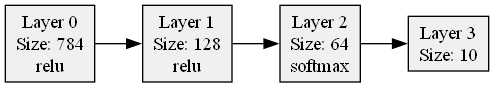

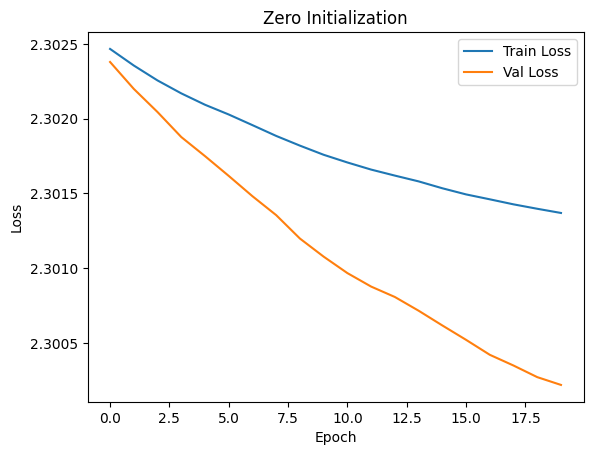

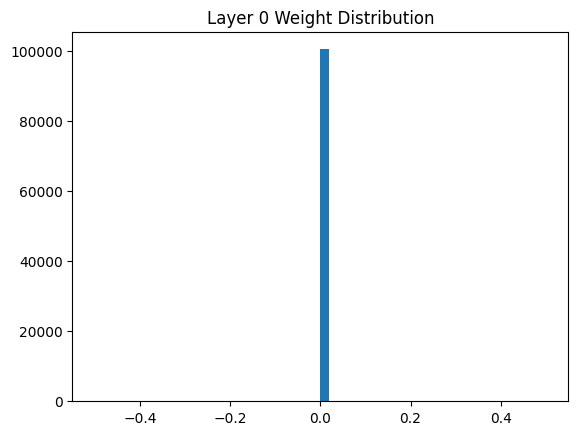

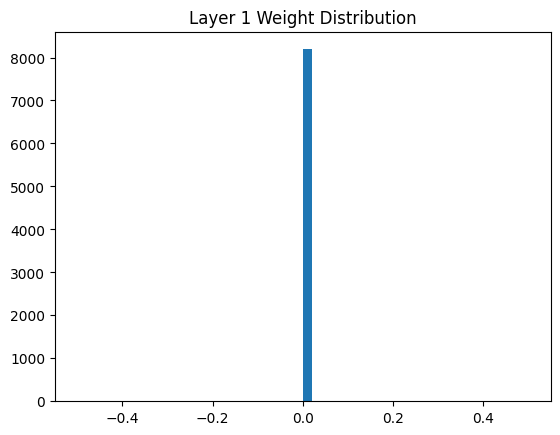

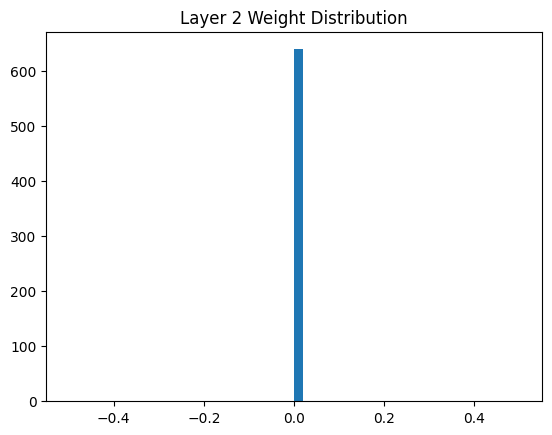

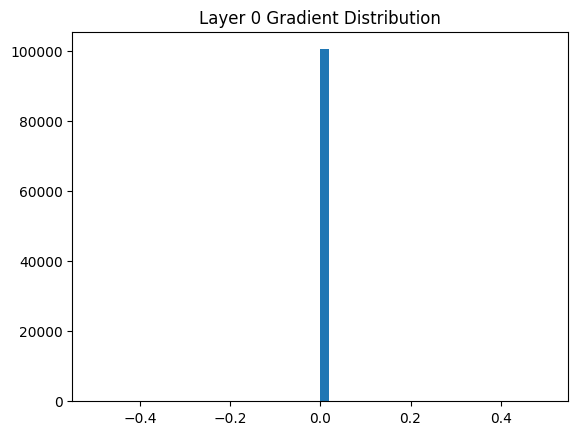

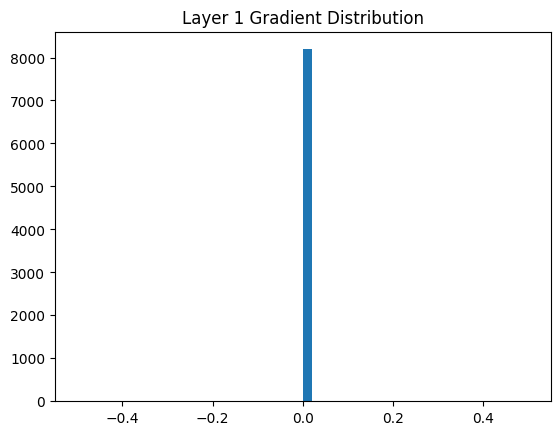

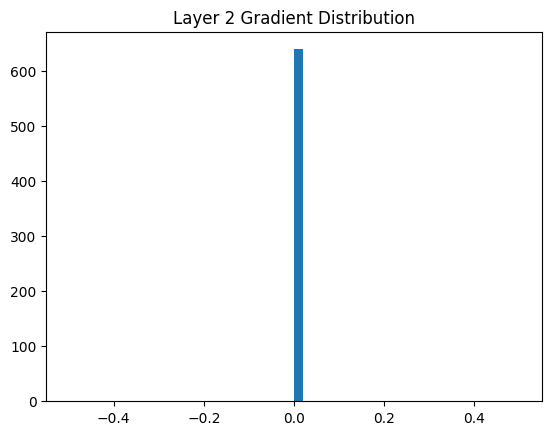

Epoch 1/20 - Train Loss: 10.6892 - Val Loss: 9.9539
Epoch 2/20 - Train Loss: 8.1837 - Val Loss: 9.0607
Epoch 3/20 - Train Loss: 5.4656 - Val Loss: 7.3318
Epoch 4/20 - Train Loss: 4.5947 - Val Loss: 6.9519
Epoch 5/20 - Train Loss: 4.7111 - Val Loss: 7.1716
Epoch 6/20 - Train Loss: 3.4631 - Val Loss: 6.0330
Epoch 7/20 - Train Loss: 2.5393 - Val Loss: 5.8739
Epoch 8/20 - Train Loss: 2.4226 - Val Loss: 5.8448
Epoch 9/20 - Train Loss: 1.9055 - Val Loss: 5.6179
Epoch 10/20 - Train Loss: 3.1707 - Val Loss: 6.3470
Epoch 11/20 - Train Loss: 1.8087 - Val Loss: 5.5462
Epoch 12/20 - Train Loss: 1.5901 - Val Loss: 5.5629
Epoch 13/20 - Train Loss: 1.6458 - Val Loss: 5.5242
Epoch 14/20 - Train Loss: 1.2051 - Val Loss: 5.2001
Epoch 15/20 - Train Loss: 3.8794 - Val Loss: 6.8465
Epoch 16/20 - Train Loss: 0.7328 - Val Loss: 4.9208
Epoch 17/20 - Train Loss: 0.8879 - Val Loss: 4.9366
Epoch 18/20 - Train Loss: 0.6025 - Val Loss: 4.8046
Epoch 19/20 - Train Loss: 0.4815 - Val Loss: 4.8548
Epoch 20/20 - Train 

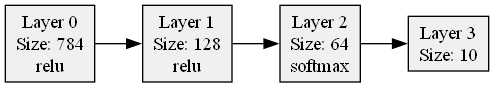

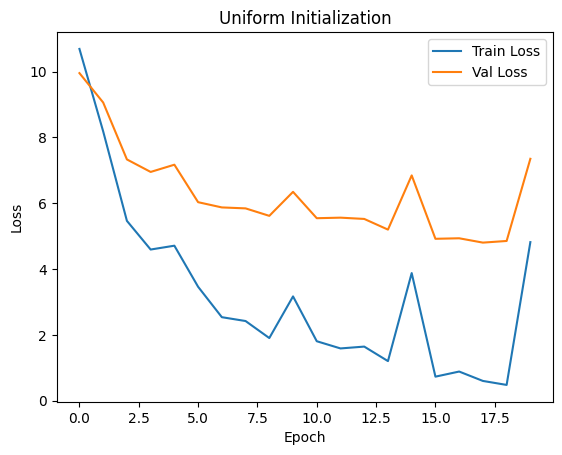

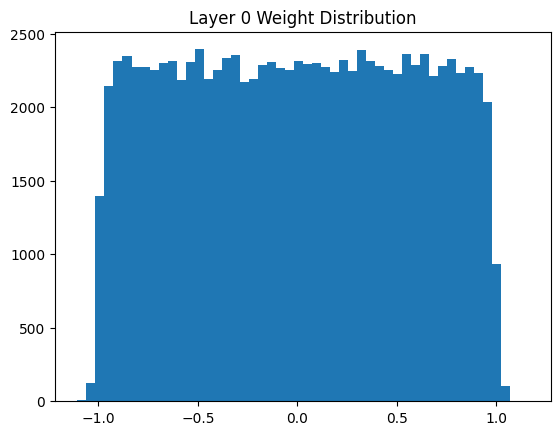

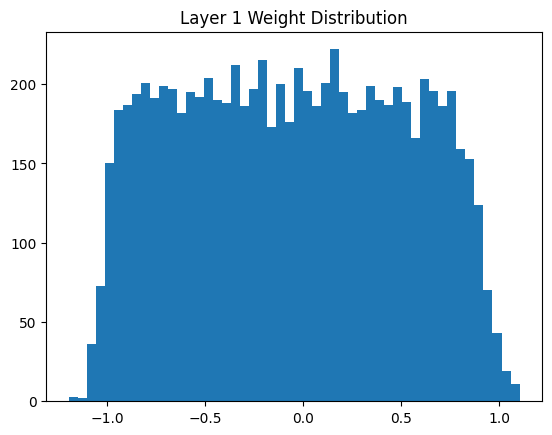

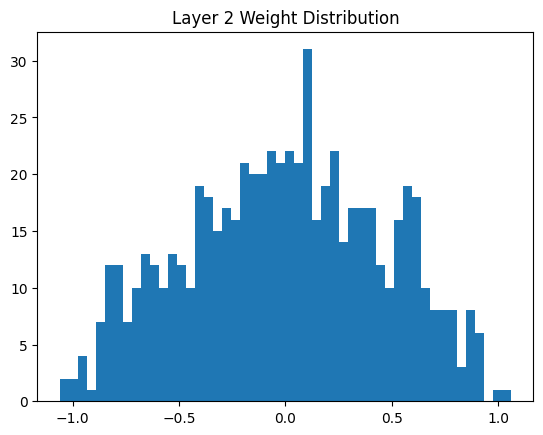

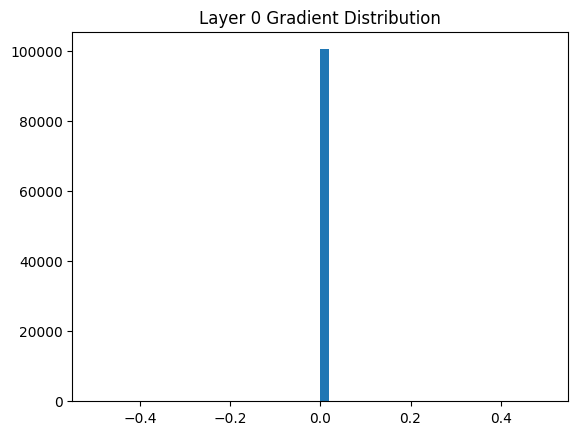

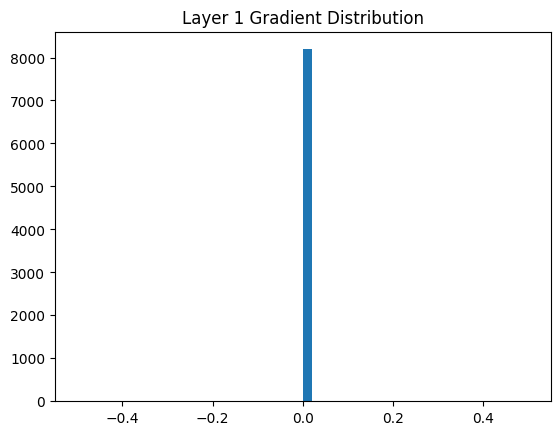

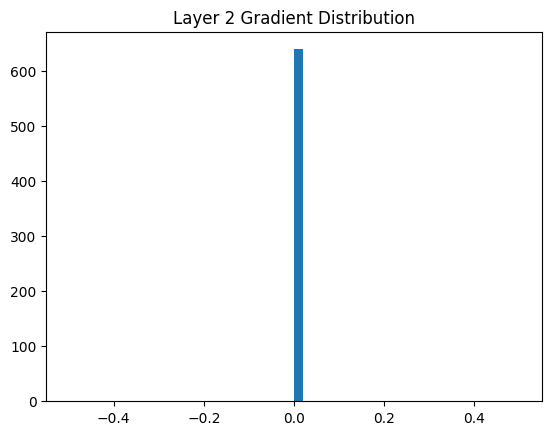

Epoch 1/20 - Train Loss: 1.9238 - Val Loss: 1.9168
Epoch 2/20 - Train Loss: 1.5349 - Val Loss: 1.5337
Epoch 3/20 - Train Loss: 1.2588 - Val Loss: 1.2672
Epoch 4/20 - Train Loss: 1.0656 - Val Loss: 1.0961
Epoch 5/20 - Train Loss: 0.9253 - Val Loss: 0.9729
Epoch 6/20 - Train Loss: 0.8216 - Val Loss: 0.8830
Epoch 7/20 - Train Loss: 0.7406 - Val Loss: 0.8116
Epoch 8/20 - Train Loss: 0.6767 - Val Loss: 0.7611
Epoch 9/20 - Train Loss: 0.6221 - Val Loss: 0.7157
Epoch 10/20 - Train Loss: 0.5770 - Val Loss: 0.6801
Epoch 11/20 - Train Loss: 0.5392 - Val Loss: 0.6480
Epoch 12/20 - Train Loss: 0.5048 - Val Loss: 0.6187
Epoch 13/20 - Train Loss: 0.4757 - Val Loss: 0.6005
Epoch 14/20 - Train Loss: 0.4538 - Val Loss: 0.5816
Epoch 15/20 - Train Loss: 0.4275 - Val Loss: 0.5639
Epoch 16/20 - Train Loss: 0.4077 - Val Loss: 0.5510
Epoch 17/20 - Train Loss: 0.3922 - Val Loss: 0.5407
Epoch 18/20 - Train Loss: 0.3744 - Val Loss: 0.5291
Epoch 19/20 - Train Loss: 0.3610 - Val Loss: 0.5182
Epoch 20/20 - Train L

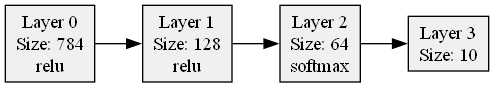

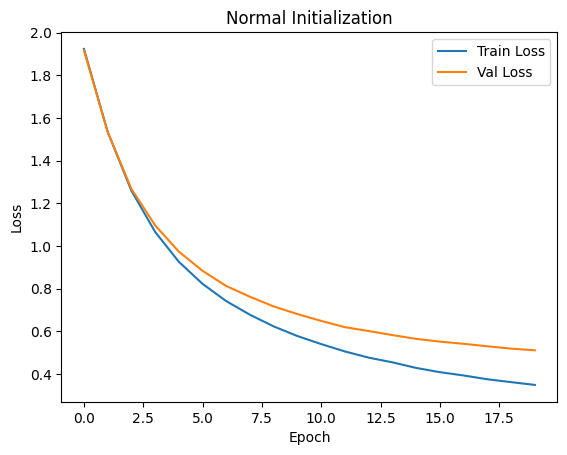

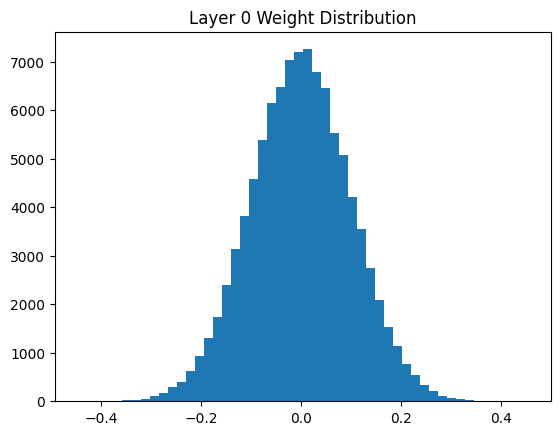

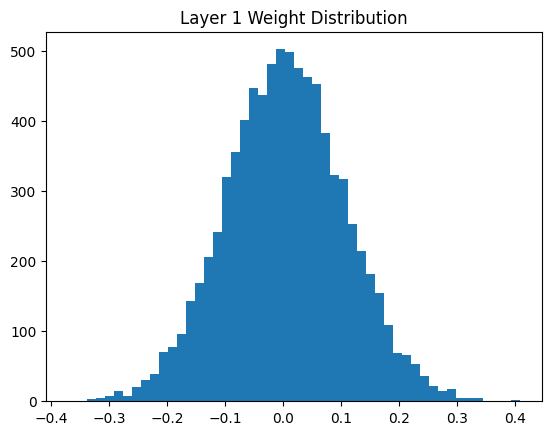

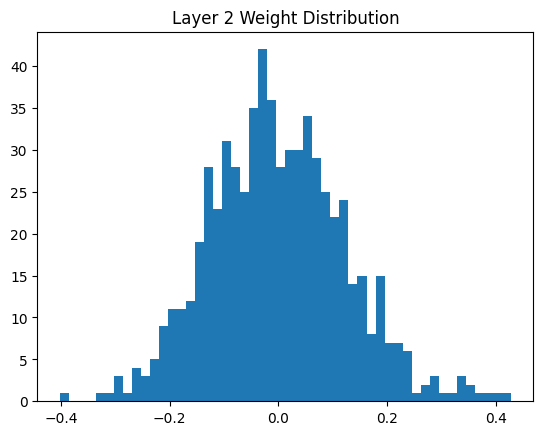

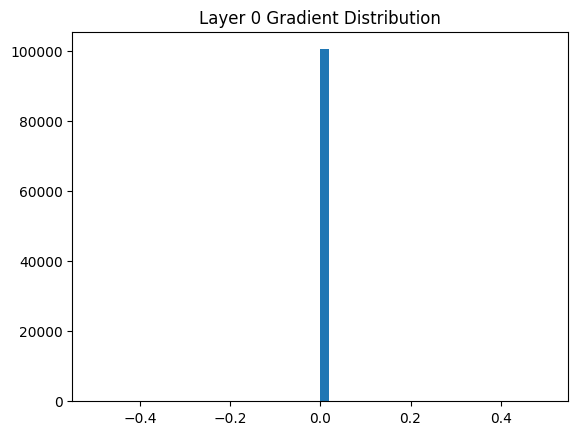

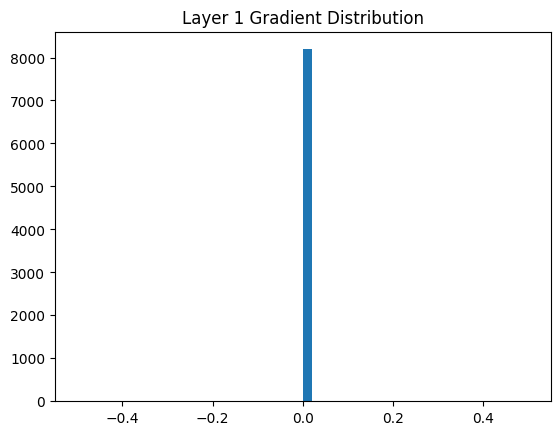

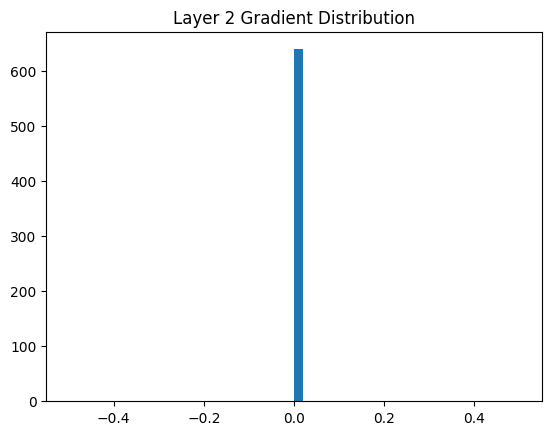


================= Hasil Perbandingan =================
Zero Initialization Accuracy: 10.69% | Waktu: 4.58s
Uniform Initialization Accuracy: 67.35% | Waktu: 5.57s
Normal Initialization Accuracy: 85.63% | Waktu: 5.25s


In [10]:
## Variasi weight initialization
# 1. Zero initialization
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu','softmax']
weight_inits = [
    {'method': 'zero'},
    {'method': 'zero'},
    {'method': 'zero'}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Zero Initialization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
zero_accuracy = np.mean(test_pred_classes == y_test_int)
zero_time = time.time() - t0

# 2. Uniform
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu','softmax']
weight_inits = [
    {'method': 'uniform', 'lower': -1, 'upper': 1, 'seed': 42},
    {'method': 'uniform', 'lower': -1, 'upper': 1, 'seed': 42},
    {'method': 'uniform', 'lower': -1, 'upper': 1, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Uniform Initialization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
uniform_accuracy = np.mean(test_pred_classes == y_test_int)
uniform_time = time.time() - t0

# 3. Normal
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Normal Initialization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
normal_accuracy = np.mean(test_pred_classes == y_test_int)
normal_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"Zero Initialization Accuracy: {zero_accuracy * 100:.2f}% | Waktu: {zero_time:.2f}s")
print(f"Uniform Initialization Accuracy: {uniform_accuracy * 100:.2f}% | Waktu: {uniform_time:.2f}s")
print(f"Normal Initialization Accuracy: {normal_accuracy * 100:.2f}% | Waktu: {normal_time:.2f}s")
print("=======================================================")

## Compare with sklearn

Epoch 1/20 - Train Loss: 1.9238 - Val Loss: 1.9168
Epoch 2/20 - Train Loss: 1.5349 - Val Loss: 1.5337
Epoch 3/20 - Train Loss: 1.2588 - Val Loss: 1.2672
Epoch 4/20 - Train Loss: 1.0656 - Val Loss: 1.0961
Epoch 5/20 - Train Loss: 0.9253 - Val Loss: 0.9729
Epoch 6/20 - Train Loss: 0.8216 - Val Loss: 0.8830
Epoch 7/20 - Train Loss: 0.7406 - Val Loss: 0.8116
Epoch 8/20 - Train Loss: 0.6767 - Val Loss: 0.7611
Epoch 9/20 - Train Loss: 0.6221 - Val Loss: 0.7157
Epoch 10/20 - Train Loss: 0.5770 - Val Loss: 0.6801
Epoch 11/20 - Train Loss: 0.5392 - Val Loss: 0.6480
Epoch 12/20 - Train Loss: 0.5048 - Val Loss: 0.6187
Epoch 13/20 - Train Loss: 0.4757 - Val Loss: 0.6005
Epoch 14/20 - Train Loss: 0.4538 - Val Loss: 0.5816
Epoch 15/20 - Train Loss: 0.4275 - Val Loss: 0.5639
Epoch 16/20 - Train Loss: 0.4077 - Val Loss: 0.5510
Epoch 17/20 - Train Loss: 0.3922 - Val Loss: 0.5407
Epoch 18/20 - Train Loss: 0.3744 - Val Loss: 0.5291
Epoch 19/20 - Train Loss: 0.3610 - Val Loss: 0.5182
Epoch 20/20 - Train L

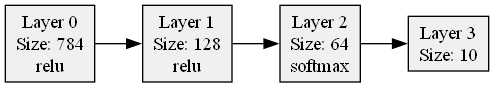

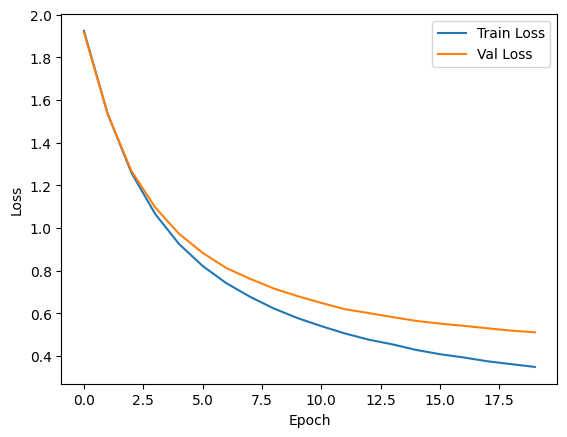

Iteration 1, loss = 1.06551259
Iteration 2, loss = 0.30050068
Iteration 3, loss = 0.17516372
Iteration 4, loss = 0.11533278
Iteration 5, loss = 0.07869404
Iteration 6, loss = 0.05350193
Iteration 7, loss = 0.03630524
Iteration 8, loss = 0.02609296
Iteration 9, loss = 0.01920493
Iteration 10, loss = 0.01429267
Iteration 11, loss = 0.01092515
Iteration 12, loss = 0.00879888
Iteration 13, loss = 0.00726221
Iteration 14, loss = 0.00601365
Iteration 15, loss = 0.00503127
Iteration 16, loss = 0.00430092
Iteration 17, loss = 0.00379492
Iteration 18, loss = 0.00339576
Iteration 19, loss = 0.00298607
Iteration 20, loss = 0.00265420


c:\Users\Jimly\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


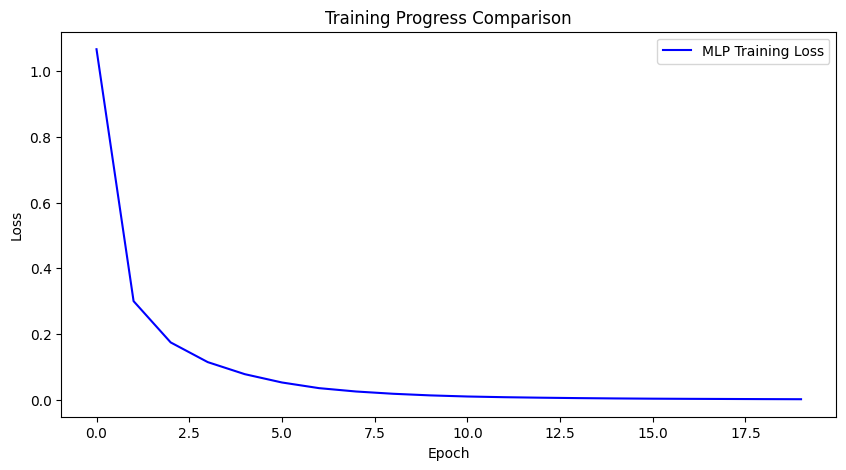

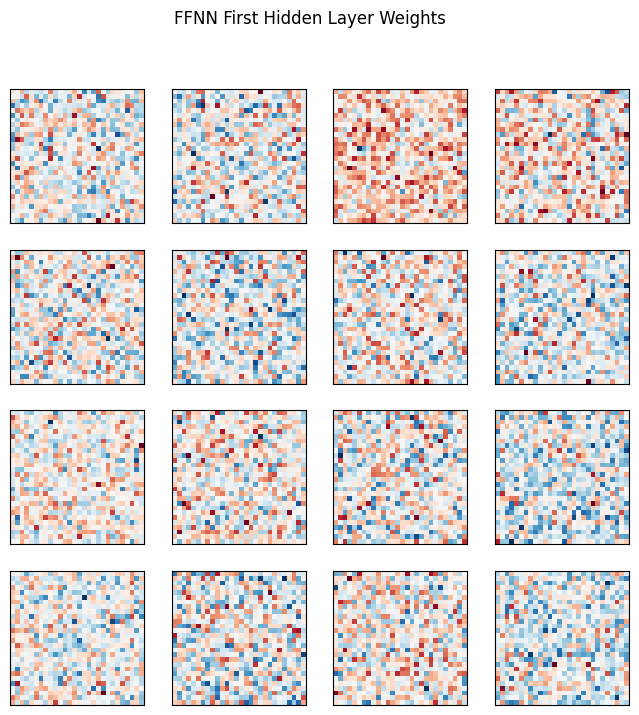


================= Hasil Perbandingan =================
FFNN Test Accuracy: 0.00% | Waktu: 4.06s
MLP Test Accuracy: 92.83% | Waktu: 4.15s


In [11]:

# 3. Implementasi FFNN Kustom
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

# 4. Implementasi MLPClassifier
# ==============================
t0 = time.time()
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=128,
    max_iter=20,
    verbose=True,
    random_state=42
)

mlp_clf.fit(X_train, y_train)
mlp_accuracy = mlp_clf.score(X_test, y_test)
mlp_time = time.time() - t0

# 5. Plotting dan Hasil
# ==============================
# Plot akurasi
plt.figure(figsize=(10, 5))
if hasattr(mlp_clf, 'loss_curve_'):
    plt.plot(mlp_clf.loss_curve_, label='MLP Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress Comparison')
plt.legend()
plt.show()

# Plot bobot layer pertama
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    if i < ffnn_model.layers[0].W.shape[1]:
        ax.imshow(ffnn_model.layers[0].W[:, i].reshape(28, 28), cmap='RdBu_r')
        ax.set_xticks(())
        ax.set_yticks(())
plt.suptitle("FFNN First Hidden Layer Weights")
plt.show()

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"FFNN Test Accuracy: {ffnn_accuracy * 100:.2f}% | Waktu: {ffnn_time:.2f}s")
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}% | Waktu: {mlp_time:.2f}s")
print("=======================================================")

Epoch 1/20 - Train Loss: 1.8665 - Val Loss: 1.8721
Epoch 2/20 - Train Loss: 1.4636 - Val Loss: 1.4826
Epoch 3/20 - Train Loss: 1.1537 - Val Loss: 1.1976
Epoch 4/20 - Train Loss: 0.9607 - Val Loss: 1.0193
Epoch 5/20 - Train Loss: 0.8055 - Val Loss: 0.8938
Epoch 6/20 - Train Loss: 0.7241 - Val Loss: 0.8278
Epoch 7/20 - Train Loss: 0.6381 - Val Loss: 0.7746
Epoch 8/20 - Train Loss: 0.6394 - Val Loss: 0.7525
Epoch 9/20 - Train Loss: 0.5309 - Val Loss: 0.6889
Epoch 10/20 - Train Loss: 0.4758 - Val Loss: 0.6462
Epoch 11/20 - Train Loss: 0.4355 - Val Loss: 0.6199
Epoch 12/20 - Train Loss: 0.4124 - Val Loss: 0.6095
Epoch 13/20 - Train Loss: 0.3974 - Val Loss: 0.5887
Epoch 14/20 - Train Loss: 0.3536 - Val Loss: 0.5631
Epoch 15/20 - Train Loss: 0.3410 - Val Loss: 0.5720
Epoch 16/20 - Train Loss: 0.3236 - Val Loss: 0.5459
Epoch 17/20 - Train Loss: 0.2952 - Val Loss: 0.5320
Epoch 18/20 - Train Loss: 0.2945 - Val Loss: 0.5385
Epoch 19/20 - Train Loss: 0.2644 - Val Loss: 0.5090
Epoch 20/20 - Train L

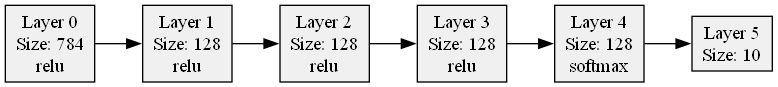

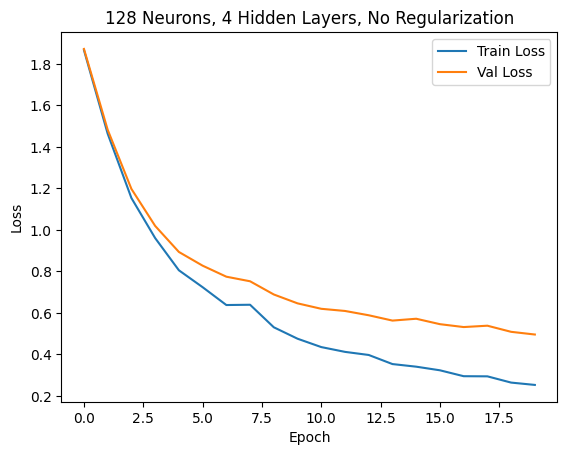

Epoch 1/20 - Train Loss: 1.8936 - Val Loss: 2.1132
Epoch 2/20 - Train Loss: 1.4914 - Val Loss: 1.7242
Epoch 3/20 - Train Loss: 1.1819 - Val Loss: 1.4399
Epoch 4/20 - Train Loss: 0.9888 - Val Loss: 1.2615
Epoch 5/20 - Train Loss: 0.8339 - Val Loss: 1.1359
Epoch 6/20 - Train Loss: 0.7523 - Val Loss: 1.0697
Epoch 7/20 - Train Loss: 0.6662 - Val Loss: 1.0161
Epoch 8/20 - Train Loss: 0.6648 - Val Loss: 0.9909
Epoch 9/20 - Train Loss: 0.5590 - Val Loss: 0.9304
Epoch 10/20 - Train Loss: 0.5040 - Val Loss: 0.8872
Epoch 11/20 - Train Loss: 0.4638 - Val Loss: 0.8609
Epoch 12/20 - Train Loss: 0.4407 - Val Loss: 0.8500
Epoch 13/20 - Train Loss: 0.4255 - Val Loss: 0.8290
Epoch 14/20 - Train Loss: 0.3821 - Val Loss: 0.8033
Epoch 15/20 - Train Loss: 0.3694 - Val Loss: 0.8116
Epoch 16/20 - Train Loss: 0.3517 - Val Loss: 0.7851
Epoch 17/20 - Train Loss: 0.3236 - Val Loss: 0.7713
Epoch 18/20 - Train Loss: 0.3228 - Val Loss: 0.7774
Epoch 19/20 - Train Loss: 0.2930 - Val Loss: 0.7479
Epoch 20/20 - Train L

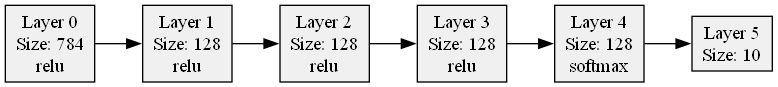

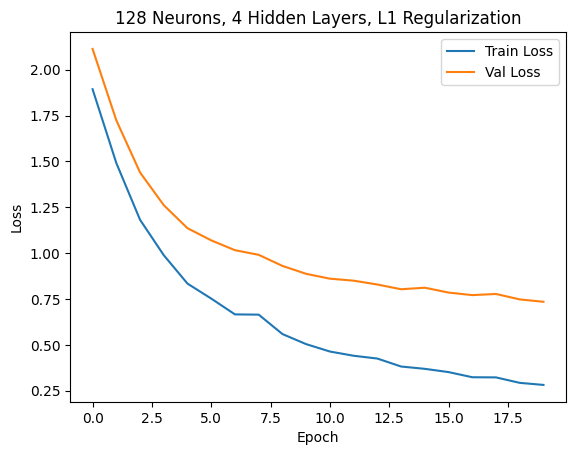

Epoch 1/20 - Train Loss: 1.8683 - Val Loss: 1.8873
Epoch 2/20 - Train Loss: 1.4654 - Val Loss: 1.4978
Epoch 3/20 - Train Loss: 1.1556 - Val Loss: 1.2129
Epoch 4/20 - Train Loss: 0.9625 - Val Loss: 1.0347
Epoch 5/20 - Train Loss: 0.8075 - Val Loss: 0.9092
Epoch 6/20 - Train Loss: 0.7261 - Val Loss: 0.8432
Epoch 7/20 - Train Loss: 0.6399 - Val Loss: 0.7900
Epoch 8/20 - Train Loss: 0.6405 - Val Loss: 0.7670
Epoch 9/20 - Train Loss: 0.5329 - Val Loss: 0.7045
Epoch 10/20 - Train Loss: 0.4778 - Val Loss: 0.6615
Epoch 11/20 - Train Loss: 0.4375 - Val Loss: 0.6354
Epoch 12/20 - Train Loss: 0.4144 - Val Loss: 0.6248
Epoch 13/20 - Train Loss: 0.3994 - Val Loss: 0.6040
Epoch 14/20 - Train Loss: 0.3555 - Val Loss: 0.5783
Epoch 15/20 - Train Loss: 0.3429 - Val Loss: 0.5871
Epoch 16/20 - Train Loss: 0.3255 - Val Loss: 0.5611
Epoch 17/20 - Train Loss: 0.2972 - Val Loss: 0.5472
Epoch 18/20 - Train Loss: 0.2964 - Val Loss: 0.5536
Epoch 19/20 - Train Loss: 0.2664 - Val Loss: 0.5242
Epoch 20/20 - Train L

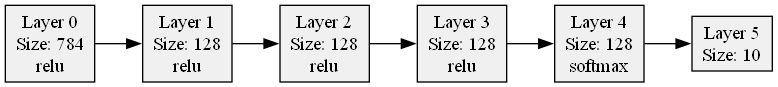

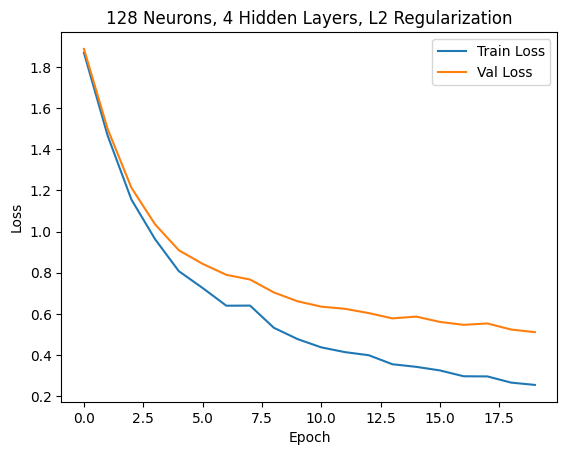


================= Hasil Perbandingan =================
TC 1 Accuracy: 85.84% | Waktu: 6.56s
TC 2 Accuracy: 85.91% | Waktu: 5.43s
TC 3 Accuracy: 85.86% | Waktu: 4.82s


In [13]:
# # Without regularization
# model = FFNN(layer_sizes, activations, "categorical_cross_entropy", weight_inits)

# # With L2 regularization
# model_l2 = FFNN(layer_sizes, activations, categorical_cross_entropy, weight_inits, 
#                 regularization='l2', lambda_reg=0.01)

# # With L1 regularization
# model_l1 = FFNN(layer_sizes, activations, categorical_cross_entropy, weight_inits, 
#                 regularization='l1', lambda_reg=0.01)

layer_sizes = [784, 128, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

## Variasi regulatisasi FFNN
# No regularization
# ================================================================================================
t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers, No Regularization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0





## Variasi regulatisasi FFNN
# L1 regularization
# ================================================================================================
t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits,
    regularization='l1', lambda_reg=0.01
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers, L1 Regularization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc2_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0







## Variasi regulatisasi FFNN
# L2 regularization
# ================================================================================================
t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits,
    regularization='l2', lambda_reg=0.01
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers, L2 Regularization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc3_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0


print("\n================= Hasil Perbandingan =================")
print(f"TC 1 Accuracy: {tc1_accuracy * 100:.2f}% | Waktu: {tc1_time:.2f}s")
print(f"TC 2 Accuracy: {tc2_accuracy * 100:.2f}% | Waktu: {tc2_time:.2f}s")
print(f"TC 3 Accuracy: {tc3_accuracy * 100:.2f}% | Waktu: {tc3_time:.2f}s")
print("=======================================================")

